In [1]:
import pandas as pd
import altair as alt

In [15]:
df = pd.read_csv("data.csv", index_col = 0)

In [16]:
wage_gap = df.loc[df.Indicator == "EMP9_5",:]

In [17]:
#lets imagine we filter by year  and 4 countries
countries = ["Italy", "France", "Greece"]
year =2019
filter_country = wage_gap[wage_gap.Country.isin(countries)]
filter_year = filter_country[filter_country.Year == year]
filter_year

,Country,Value,Year,Sex,Indicator
4,France,11.5,2019,Tot,EMP9_5
6,Greece,5.9,2019,Tot,EMP9_5
10,Italy,5.6,2019,Tot,EMP9_5


In [48]:
countries = filter_year.Country.tolist()*2
male = filter_year.Value.tolist()
female = [0]*len(male)
y = list(range(1, len(countries), 2))*2 #for both females and males

In [74]:
man = "data:image/png;base64,/9j/4AAQSkZJRgABAQEAAAAAAAD/4QAuRXhpZgAATU0AKgAAAAgAAkAAAAMAAAABAAAAAEABAAEAAAABAAAAAAAAAAD/2wBDAAoHBwkHBgoJCAkLCwoMDxkQDw4ODx4WFxIZJCAmJSMgIyIoLTkwKCo2KyIjMkQyNjs9QEBAJjBGS0U+Sjk/QD3/2wBDAQsLCw8NDx0QEB09KSMpPT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT3/wAARCAHaAdoDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD2WiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACikJAHNZ11rlna5BkDMP4U5NS5JLVlRhKbtFXNKkNctc+KZmBFtCqD1bk1lz6jd3OfNuHIPYHA/SsJYmC21O6nl1WWstDtJ9TtLb/WzxqfTNZ03imzj4jSSU+wx/OuSzS1jLFSeysdkMspr4m2b8viyVsiK3VfQsc/pVR/EWoP8Axov+6o/rWVzRWTrTfU6Y4SjHaJYlvribmSTd+AqHcfWkorNtvc3jFJWSsLk+tJk0UUihcmjcfWkooAkjuZojlHwfoKuxa/fxcCUMPQoKzaWqU2tmZypU5/Ekzbi8VXK/6yKN/pkVdi8V27YE0Uie45FcvSVqq811OaWBoy6WO5g1qxnwEnUE9m4NXFdXGVIIPcV53UsN1cW5zDK6fQ8VrHF90ctTLF9h/eeggnFAzXI23ie8iwJlWZfcYNbFr4ksrjAkYwsezDj863jXhLqcVTBVqfS68jXopqSLIoZGVgehBzTq2OXYKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACimu6xqWYgAdzWDf+J44spaKJGHG8/d/wDr1E5qCu2a0qM6rtFXNyWZIULSOqKOpJrFvfE8MWVtF81v7x4Wucur2e9fdcSs57DoB+FQVyVMS3pHQ9WjlsY61Hd9i5dardXmfNmO0/wrwKqUlLXNKTk7tnowpxgrRVkFFFFSWFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAS295PaHdbysvsDx+Vbll4pZcLex5/20/wAK52gjNaQqyjsznq4anV+JfM7+1voLxN0EgYdwOtWBXncUrwuHico47qa3LDxO6YS9XcvTeo5/EV108SpaS0PLr5dOOtN3X4nU0VBbXUV1GHhdXU9wanrpTTPNaadmFFFFMAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiimySJEhd2CqBkknGKA3FrO1LWrewBUnzJf7in+fpWTqniNpMw2JKr0Mnc/T/GufJLEliSSeSe9clTEJaRPTw2XuXvVNF2Ll9qlzqDnzXwnZF6f/XqnRS1xyk5O7PYhCMFaKsgoooqSwooooAKKKKACikrM1HX7OwJQsZZR/AnOPqe1XCDm7RV2ZVasKS5pOxp1XudRtbQZuJ0TjO0nJP4VyF94hvb3Kq/kRf3YzjP41lEkkkkknkk85rtp4FvWbseVWzdLSmr+Z1tx4utoziCCSXH8RO2s6fxXeycRpFFzwQNx/WsOiuuOFpR6X9TzqmYV5/at6GifEGpElvtLc84AAqRPEmppx56n6oDWVRWnsYPojFYmstVNm5B4tvEwJI4pBnk4wa0rfxdbSECeGSLJxkHcBXI0VnLC0pdLehtTzCvD7V/U9Ftb62vU3W0yyeoBwR+FWK80jkaJw6MyuvRgcYrpNI8TMzrBqBHzHCzY/n/jXFWwTirxd0ephs0jUajUVn3OnooorhPXCiiigAooooAKKKKACiiigCS3uprOQSW8jK3setdNpviOO4xHdYjk/vfwn/CuUpa1p1ZQfkc1fC06y1Wvc9GUgjIpRXFaXrk9gyo+ZIfQnlfp/hXW2d5DexeZCwZf1Fd9OqprQ8PEYWdB67dyxRRRWpzBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRVDUtTi06Lc/wAzn7qDqaTaSuyoQc2oxV2TXl7DYwmSZsDsO5PtXH6lq82ovhspCPuoD/P1qC8vJr+YyzNk9gOi/Sq9efWruei0R7uFwUaS5pav8haKKK5zvCiiigAooooAKKKKAEqO5uYbOBpp3CRgck9//r1Ff38OnWxmmP8AuqOrGuH1HUrjUpjJO2FB+VB0X/6/vXVh8M6ru9EcGMxscOrLWRf1TxLPd5itswwnqQfmb/CsWiivWp04wVoo+bq1qlV802FFFFWZBRRRQAUUUUAFFFFABRRRQB1/hfUDc2rW0rEyQjKk91/+t0rerivC8jJraKDw6MCPXjNdk8kcQLSuqKOpY4xXjYqny1Wl1PqMurc9BOT20HUVny67psR2tdIT/sgt/Koj4m00HAlY+4Q1kqM3smdDxNFbyRq59qWs2PxBpsjhRdKCfVSP51eimiuE3QyLIvqhzUuEo7pouFanP4WmSUUUVBqFFFFABRRRQAhqe0vJrKUSQOVbuOx+tQ0lNNp3RMoqStJXR22l6vDqSYHyzL95Cf5etaJPavOo5HikDxsVdTwQeldZo2uLe4gn+WcdD2au+jXUtJbniYvBOnecNV+RtUUUV0nnBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUVQ1PUo9Oty7fM7cKvqaTaSuyoQc2oxWrG6pqkWmw5OGlb7iZ61xtxcSXc7TTMWY/p/8AWouLiS7naWZtzN+n/wBaoq82tWc35H0GFwqoLu2LRRRWJ2BRRRQAUUUUAFFFFACVBe3cVjaPPOcKo4A7n0/GpiwAJJAAGST2rhtc1Q6leHaT5EZxGvr7/jXRh6Lqy8lucWNxSw8NN3sV7+/m1K5M059lUdFFVaKK9qMVFWWx8tKTnJyk7thRRRTJCiiigAooooAKKKKACiiigAooooAkhuJbaTzIHZHwQGHbNNkkeU7pHZ29WOTTaKVle5XM7WvoFFFFMkKkhuJbaQPBI0bjupxUdFJpNWY03F3R1GkeKBIRDqBAY8CYDAP1/wAa6Tg4I6HpivM66nwvqzSL9hnbLKMxMT1Hp+FedisKkueHzR7eAzByap1He+zOkooorzj3AooooAKKKKACgEgggkEHgjjFFFAHU6HroucW90cTY4Y/xf8A163a84BIIKkgg8EV1mha2LxRbzkCcdCf4xXdQr392W54mNwfLepBadUblFFFdZ5gUUUUAFFFFABRRRQAUUUUAFFFFABRRTZJFiRnchVUZJNAbkF7eR2Ns00p4HQdyfSuIvLyS/uGllPJ6KP4R6VPq+pNqNzkZEKH5F/rVCvOr1ud2WyPfwWFVKPNLd/gLRRRXOd4UUUUAFFFFABRRRQAUUVHLKtvC8rnCICxNNK+iE2krsw/FOpGC3FnG3zyjMmOy+n41yVTXl097dSXDn5nOQPQf/WqGvcoUlTgl16nyWLxDr1XLp0CiiitjlCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACpLeZraeOZDho2DCo6KTV1ZjTcXdHpMMq3ECSr911DD8aeOlZXhmcy6NGD/wAsmKfXv/WtXvXg1Y8snHsz7KhP2lNS7oWiiiszUKKKKACiiigApVZkcOjFWHIIpKKA3Oz0bVhqMG18CdB8w9fcVqV57a3ElpcJLEcMv6//AFq7fT76O/tVlj+jD0NejQq86s9z5/G4X2UuaOzLdFFFdBwhRRRQAUUUUAFFFFABRRRQAn4VzHiPVPMc2ULfKp/eEdz6Vra1qQsLPKkea/CD+tcSSWYkkkk8k965MRUsuVHp5fhuZ+0lsthaKKK4T2wooooAKKKKACiiigAooooASsLxZeeVYJbqfmmbJ/3R/wDXxW7XDeI7r7Vq0gB+SL92Pw6/rmurCU+eom9kefmVb2dBpbvQzKKUggkEYI6g0leyfLhRRRQAUUUUAFFbmheD9V8QEPaweXbk8zy/Kvvj1/D869F0f4ZaPYorXwa+mxyX4T8FH9c1LmkUoNnkUNvNckLbwySnOMIpb+VbNr4I8Q3hITS5kwOs2I8/nXuNtZ29lH5drBHCn91FCj9KmrN1H0NFTR4ovw28SHraRL9ZlP8AWg/DbxIOlpEfpMv+Ne10UvaSD2aPCLnwR4htW2vpczn1iw4/Ssu50y+tJDHc2VxE46q0Z4r6Lop+1fYPZrufN/2W4/595/8Av2aa8UsYy8UiD1ZSP519JVHLbxXC7ZokkX0dQRT9p5C9n5nzcCp6EH6Glr6Bu/Dej30YS5021dQc/wCrA/lXL6n8KtMuEZtOnmtZMcBjvUn8efypqonuJ02tjyaitrXPCOreH8td2+6DOBPGdyfj6fjWLVpp7GbTW4UUUUwCiiigDqfBzE210vZXBH4iukrmfBxOy7HbKn+ddNXiYpWqs+qy53w8QooornO4KKKKACiiigAooooAKvaPqJ067BJPlPw49PeqNJVRk4tNEVIKpFxlsz0VHV0DKcqRkEU6uc8NamSPscrcjmMn09Pwro69SnNTSaPma9J0puLFoooqzIKKKKACiiigAprusaFmICgZJNOrn/E9/wCVCLVD80gy2P7tROagm2a0aTqzUV1MPVL9tQvHlydg+VB7f/X61Topa8uUnJ3Z9NCChFRWyCiiipLCiiigAooooAKKKKACiiigCOWQQwvK3RFLHHtXIabYsYJ9XulJjjBeNT/G3r9Aa6+aJbiF4nzscYODisfxRItvoywooVXcKAOMAc/0rqw02nyrdv8AA8/G0lJe0ltFficeSzksxyzHJPrSUUV7J8uFFFFABycAAkk4AHOa9J8HfDlSI9Q12PORujtT0Hu/+H5+lHw58HBhHrWopkHm2jYZ/wCBn+n516XWU59Eawh1Y1EWNAiKFRRgADgU6iisjUKKKKACiiigAooooAKKKKACiiigBkkaSxtHIodGGGVhkEV5h42+H4so31LRY2MI+aa2HO0f3l9h6V6lRTUmmJpNWPmuiuw+IXhb+xNT+3WqYsrps4AwI39Poev51x9dEXdXRzyVnYKKKKYjqPB3+pu/95f5Guk7Vg+EYtthNJn78mMfQf8A163u1eJinesz6vAJrDxFooornO0KKKKACiiigAooooAKKKKAHRSNDKsiEhlOQRXdadeJf2aTr1I5Hoa4Otbw9f8A2W88hz+7lOOezf54row9TllZ7M4MfQ9pDmW6Oxooor0TwAooooAKKKKAI5pVhieRzhVGSa4K9uWvbuSZ+rHgegro/E175Vstqp5l5bHp/wDrrla4cTUu+VdD2sto8sXUe72FooorkPUCiiigAooooAKKKKACiiigAooooAK5rxjIfLtYuxJb8uP610tct4x/1lp/ut/SunCK9VHDmTaw8rHN0UUV7R8qFb3gzw8fEWuxwup+yw/vJ2Hp/d+pPH0zWDXtPw80T+yPDkckq4uLs+dJkYIH8I/AfzqJuyKgrs6lEWNAiKFRRgKB0FOoorA6AooooAKKKKACiiigAooooAKKKKACiiigAooooAyvEejpruiXNi2N0i5jJ/hYcg/n+leBSRtFI0cilXQlWUjGCK+kq8P8f6aNN8XXQUARz4nUA9N3X/x4E/jWlN9DOotLnN0UUVsYnc+HIhHokBAwXyx9+f8A6wrUqvYxGGxt4yMMsagj8KsV4FV802+7PsqEOWnGPZBRRRWZsFFFFABRRRQAUUUUAFFFFABQCQQRwQcgjtRRQB3GkXwvrBHJ+dflce4q9XIeG7z7Nf8Aksfkl4/H/PFdeK9SjPngmz5rF0fZVWuj2FooorU5gpDgDNLWbrl19l02RgcMw2j8f/rVMmkmyoRc5KK6nK6rd/bNQlkzxnav0FU6WivKlJybbPqacFCKitkFFFFSWFFFFABRRRQAUUUUAFFFFABRRRQAVy/jEfPaH2YfyrqK57xeo+xW7Y5EmM/hXRhXaqjhzBXw8jk6KKK9s+VL+haadX1yysgDtllG7jOFHJ/DFfQaII0VFGFUYAHavJfhVYfaPENxeMp220OFPbc3H8s165WNR62Nqa0CiiiszQKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvMPi5aYudOvAgAZWiZh69QP516fXBfFqIvoNnIOkdxz+KkVUNyZq6Z5RVvSrf7VqdvFgEM4JB7gc/wBKqVv+EYN17NORxGm0cdz/APq/WtK8+WDfkGFp+0qxj5nXUUUV4B9gFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAKrGN1ZThlOQfSu9sblby0inH8S5P1rgK6XwrdZjltmP3TuX+v+feunDTtK3c83MaXNT51ujo6KKK9A8MK5XxTc7riO3B4Qbj9T/9b+ddTnrXBajP9p1GeTsWIH0HFc2JlaFu56GXU+arzPoVqKKK8894KKKKACiiigAooooAKKKKACiiigAooooAKyfE0Xm6NIQMlGDZ9K1ar6jF9o025izjdGea0pPlmn2ZjiIc1KUfI87ooHQUV758aer/AAltBHol5dZO6afYR2wo4/8AQjXe1y/w5hWLwXZsow0rO7e53EfyArqK55O7Z0R2QUUUVJQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFcf8UAD4OckcieP+ddhXFfFSXZ4VSP8A56XCfpzVR3RMtmeQV2fha38jSRIQQ0zFue46CuMAJIA6k4FejWluLazhhAxsQAgVjjp2go9zuyineq5voT0UUV5R9EFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAJV3SLn7JqMLk4UnafoapUvI5HUdKqMmmmiKkFOLi+p6P2oqrp9x9qsYpeu5Rn61ar107o+VknFtFXU5/s2nTydwhxXAmut8UzeXpyxjrI4H5c1ydcGKd5Jdj28sham5d2FFFFcp6QUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAmKUgEEEZBGCPWkFXNN0+TULoRodqjlmx0H+NVGLbstyKkowi3J6Hlt7Cba9nhOPkcjioa6r4h6OmkeIU8okxzwhx7EcHn14z+Ncr6178G3FX3Pjalud22voe8eDIPs/g/TE9YA/8A31z/AFrcrL8L/wDIraV/16R/+gitSud7my2CiiigYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFcD8W3xoliv964/wDZTXfV5r8Xbk7dMtf4SXk/LA/rVQ3RM9jg9Et/tOsW6EAqG3EHuBzXfVnfC3SI769vrqdA6RxiNQwyMsc5H4L+tdVreiiwxPBkwk4I/u//AFq5cbBt3WyPUyurCC5HuzHooorzj3AooooAKKKKACiiigAooooAKKKKACiiigAooooA6rwrNvsHiJ5jf+dbmK5PwvNt1B4+zrn8q6zJr06DvBHzeOjyVn5nL+LJc3EEWfuqSRWB3rV8RPv1d/8AZUD9M/1rKrhrO82e3hI8tGItFFFZHSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAJXWeF4QunO/wDE79fpXKV13hiQPpZXurkEV0Ya3OcGZN+x+ZzvxV077ToNvfKCWtJcNjsrcH9QPzryb1r6G1rT11XRruybH76IqCRnB7H8Dg189SRtE7RupV1JVlPYivXpvSx81UWtz3/wv/yK2lf9ekX/AKCK1KwfA8xn8HaaxOcRbfyJH9K3qxe5qtgooooGFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXkvxYujJr9rb44ht9w99x/+xr1qvCvHV59u8Y37RszqjiJfbaMEf8AfWaumtSJvQ9H+GlgbTwlHKwYPcyNKQfToPzAB/Guj1KJZ9OnRuhQmo9DtDYaHY2pO4xQIpOMdBUuoSCGwncnGEP8qibunc1p3UlY4KiiivHPqwooopDCiiigAooooAKKKKACiiigAooooAKKKKALujS+Tq1u2eC20/jXb4Neewv5dxG/91gf1r0HzK7sNK0TxMzXLOMu6ODvpTNdvIf4sfyqClbqaSuJu7uezGKSSXQKKKKRQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAlbvha6EdzJbseJBkfUf/WrDp8MzwTpJGcMhyK0pz5JJmOIpe1puJ6JXiXxC0n+y/FUzxriK6HnLgdz979efxr2SxvEvbVZozwe3ofSuR+KOlfbPDyXqLmSzfcSP7h4P5cGvXpyV0+jPlqkGrp7os/DO8Fz4Pii6NbyvGeevO7/2bH4V11eWfCbUhFf3unuQDOolTJ6leCPyOfwr1Oias2KDugoooqSgooooAKKKKACiiigAooooAKKKKACiiigAooooAr390ljYT3Un3IY2c49AM14X4dgfWvF1mshZmmuPNkbGTwdxP6frXovxR1UWnh5bFGHm3jgEf7C8n6c4rnfhRppn1u5vyDsto9gIP8Tf/WFaR0i2Zy1kkesVi+JroQ6eIQfmmOPwHNbLMFBLEAAZJNcPq9//AGhfNIpPlr8qD2/+vXJiJ8sLdz0cDRdSqn0WpSooorzT6EKKKKACiiigAooooAKKKKACiiigAooooAKKKKAErf8A7UP96sGpd1XGTWxjVpRqWuRnqaSg9aKg2CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA0NI1VtOnIbLQv94envXV3EUGrabLASrQ3EZXI54Irg6u6fqk+nP+7O6Puh6f/Wrpo1+XR7HnYzBKr78N/wAzzrT7qfwv4lSVgRJZzlJBnqAcMPxFe+QTx3MEc0LBo5FDKR3Brxbx6kc2uDULdGRLlBvB7OOD+Ywfzrpfhj4m3odEun+ZAWtiT1Hdfw6j2zXqNqcVJHgOLpTcJKzPSKKKKzKCiiigAooooAKKKKACiiigAooooAKKKKACkJABJ4Apa5L4heIho2htbwPi8u8omOqr3b+n1NNK7sJuyPOPHGtDXPEs8qNm3g/cxc8EDqfxOa9M+H+lf2V4Uty4xLc/vnz79P0wfxrx/SLMX2p29u+4RM4MhXso6/jivVdQ12S5QQ26+TABtAB5I/oKVetGmkuprhcLUru627lvX9YEwa0t2+XpI4P6CsCkoryqk3N3Z9JQoxox5Yi0UUVmbBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAU+mU6gQh6mkpT1NJQMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAz9asft+myRgfvFG9PqP8elcNbXMtldR3Fu7RzRMGUjsRXpFcP4h082OpMyjEMx3Jjse4r0cFU3g/keJm1C9qq6bnsfhTxJD4l0lZ1wlxH8s8f8Adb/A9a3a+fvD2vXPh3VEvLYkj7ssZPEi+h9/evc9H1e11zTo72zfdG45B6qe4PvXVONmeTCV0XqiuLmC1UNcTRxKTgGRgoP51LXk/wAV9T+0axbaerHZbx+YwB43N0/EAfrSiruxTdlc9N/tfTv+f+0/7/L/AI0f2vp3/P8A2n/f5f8AGvnaitPZ+ZHtPI+if7X07/n/ALT/AL/L/jR/a+nf8/8Aaf8Af5f8a+dqKPZ+Ye08j6J/tfTv+f8AtP8Av8v+NH9r6d/z/wBp/wB/l/xr52oo9n5h7TyPoj+19O/5/wC0/wC/y/40+G/tLl9lvdQSvjO1JAx/SvnStfwpqZ0jxPZXW4iPzAknOMq3HPsMg/hSdOy3EqibtY99ooHOCOhpkssdvC8szqkaDczMcACszUg1HUbfSrCW7vJBHDEuWJ/kPevBvEGtz+INYmvp8jccRp/cQdB/nua2fHHjB/EV2Le1LLp8LZQf89D/AHj7egrmrW2e9uo4Ix8znH0//VWsUormZk7zkoo6XwlY+XbyXjj5pDtTPYd/zP8AKuiqO3hS2gjijGEjUKKlrxq03Um5H1eGoqjSUEFFFFZHQFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAU+mVJimJhcxmK4ZD1GP5VFWlr8XlavKB0YKR+X/1qzqc1ZtGdKXPTUu6CiiipNQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAEqlq+nrqVg8XHmD5oz6H/6/Sr1JVRk4tNboipBVIuMtmeaOjI5VgQynBB4xWv4a8TXfhq+823/eQOf30JOA4/oR61a8UaWYpPt0K/u3OJAB0Pr+Nc7XuU6iqwTPka9GVCo4vp+J9BaPrtlrmni8spQyAfOp4ZD6MOxrwzXdROra5e3pJImlJXI5CjgfoBUNjqV3pplNpO0XnIY5ADwykY5/Oq1VGFmzOU7pG14c8PJ4iuGtl1CK2uBykcik7x3wfUeldN/wqO+/6CVv/wB+zXAxyNFIskbMjqcqynBB7V6B4d+KEtuq2+uo0yDpcRj5h9R3+oolzboI22Yn/Co77/oJW/8A37NH/Co77/oJW/8A37Nd/p3iPSdVjD2d/C/+yW2sPwPNaYIIBBBB9Kz55I05Is8t/wCFR33/AEErf/v2aP8AhUd9/wBBK3/79mvSbrU7KxjL3V3DCo6l3Arjdd+KFjaxNHo6m7nPAkYFY19/U01KT2E4xRyPiHwR/wAI5ZefeapAXY4jiVDuc+3+NcrVvU9VvNYvWur+ZpZW4yeAo9AOwqpWqvbUydr6Hu/h3XIrvwla6ldSrGqxYmdyAAV4J/MZ/GvN/GfjmXXnaysS0Wng85+9L9fQe1cub65NiLLz3+yhzJ5YOF3Hv+gqCpjCzuU5tqyCus8Lab5MBvJV/eTDCZ7L/wDXrC0fTG1O9CEERJ80jeg9Pqa7wBVAVQAqjAA7Vx42tZci3e56uV4W79rJaLYdRRRXln0AUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAhrU/s5vQ1mxr5kip6kCu/FsmBwK2pQ5kcGNrulZI5rxVFtv4pP76Y/I//XrErqPFcW60ilA+6+CfrXLU66tNl4GXNRXkLRRRWB2BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADJokmjaOVQyOMEHvXEa7oVxodxH5ikwTrvhk67h6fUV3PLcDqeldhqvh601zRFsLpcKFHluByjAcEV3YKTTfY8bNopxjpqeB0Voa5ol34f1J7O9TDDlHA+WRfUf54rPr1dzwGrBRRRQAdDkcH1HFSC5nQFVnlCnqA5GajooAUln+8Wb6nNJRRQAUUUUAFT2Fhcanew2dpGZJpW2qo6e+fQDrmo4YZbmeOC3jaSWRtqIgyWNezeCvB0Xhy08+5CvqEo+dh0jH91f6nvUylZFRjdnMWGmLpEBthgyA/vG/vN/hVqr2sRiLV7hR0Lbh+PJqiDmvBqNuTvvc+woJKmuVW0FoooqDYKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAtaXF52qW6ergn8Of6V3tcf4aiMmqb8cImT+PH+NdfXoYWNoNng5nO9VLsUdag8/SZ0AyQuR+HNcNXorqHQqeQR0rgLqE291LCf4GIrPFx2ZvllTRw+ZFRRRXGeuFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAlLSUDqauEHOSit2Z1asaUHOT0Q6MhJVY9AQTXoiHKA+1edV2uiXgvNNjJOZIxtb8P/AK1e3LCKhBW1fU+PWZSxlV82iW3oM1/QLPxDp7Wt4nIyY5APmjb1H+HevF/EXhm+8N3XlXa7oWP7udR8r/4H2r32oLyyt7+2e3u4UmhcYZHGQaiM2jSUUz5yor0TxB8LpUd7jQpBIh5+zSnBH0buPr+ZrgLq0uLGYw3cEkEgPKyKVrdSTMHFoiooopiCiilRGkcIisznoqjJNACVYsNOutUvI7SyhaaZzgKO3ufQD1rqNB+HGqartlvh9htj3cZkb6L2/HHXvXqOi+H9P8P2vk6fAEz95zyz/U1EppbFxpt7mR4P8FW/hyL7RORPqDjDSY4Qei/4966qio5pVgheVzhUGSaxbbZtZRRxviFgdZm29gAfyrNqW4mNzcyTN1kYsfaoqjG4HkgqsfmjpyjNnUqPD1PkxaKKK8g+mCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOm8KQ4t5piPvNgH6VvYNU9Gt/s2lwpjkruP1NX69akuWKR8xiKnPVlIQjmuR8T23laiJQPllX9Rx/hXXY5rJ8R2v2jTC4HzRHd+Hf8Az7VFePNBl4Kp7Osuz0OPooorzD6QKKKKACiiigAooooAKKKKACiiigAooooAKKKKAEooqWO2mk6IQPU8VcKcpv3U2ZVK1OkrzaRF9aKurp//AD0f8AKr3CLHMVXOBxzzXrYDBzjVU5qyR83nGaUalB0qTu3uR1f0fUTp14GbPlP8rgfz/CqFFe3OKmmnsz5OnUcJKS3R6JHIsqK6MGVuQRT647RtZNiRDPlrcng/3P8A61ddHIsqK8bBlI4I715FWk6bsz6ChXjWjdbj6rXun2moRGK8t4p0Ixh1BqzRWZucje/DTQLos0UMtsx6eU5AH4His4/CPTc8ajeAemE/wrv6Krma6k8q7HFWvwr0SHJuJLq49Nz7QPyrpdO0DTNIH/EvsYICepVefzrQopOTfUaSQUUUUhhXLeI9VEzfY4WygP7xh6+lWNa14RhrazbMh4aQfw/T3rma7cNQbfNL5HmY3FJJ04PUKKKB1H1rtqwU4OPdWPOoVHSqRqLo0xKKvvp6nlGI9jVdrOVP4dw9q+XqYOtDpc/QaGaYWtopWfmQ0UEEHBBB9+KK5dj0E09UFFFFIYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAlT2Fsbq9hhH8TDP0qCt/wta77iS4I4QbR9f/1fzrSlHmkkc+JqezpOR1CgBQB0FLRRXqnzIU2RBJGyMMhhginUUBsee3lu1pdyQN/C2B9KhrofFNnho7tRwflf+lc8DmvLqw5JNH02Gq+1pqX3i0UUVkdAUUUUAFFFFABRRRQAUUUUAJS1JFbyS/dXj1PFXIrKNMFvnb3rro4OrW2Vl3Z52KzPD4bRu77IoxwvL9xSfftVuOw7yN+Aq4owuAMD2or1KOXU4az1Z85ic8r1dKfur8SOOGOP7qgH1qSiiu+MFFWirHjzqSqPmm235hWXdf8AHzJ9a1KzL0YuT7gGtI7mM9iGiiitDIKu6dqtxpz/ACHdGTzGTwfp6GqVFTKKkrNXKhOUHeLszuLDVrfUFHlttfHKN1H+NXs150CyEMpIYHIIPStmx8TXFvhLlfOQfxfxD/GuCphGtYanq0MfF6VNH3OtoqlZ6pa3oHkyDcf4G4P5Vdrkaadmj0IyUldO4UVDcXUNqm+eVUX/AGjisG98U9Uso8/9NHHH4CqhTlN2iiKlaFNXkzdubqG0jMk8ioo9a5fVPEEl3mK23RRHgn+Jv8BWXcXEt1IZJ5Gdz3J6VHXfSwqjrLVnlV8dKekNEFFFFdZwBR6fWilXlwPekC3NcfdH0paKKyOga8ayDDKD9RVeSwQ8oSp9DzVqisamHp1PiR00MbXoP93J+hlSW0sXVcj1HNRVtVDLaxS5OMN6jivNrZY96b+R7+G4gWirx+aMuip5bOSPJA3L6ioK8upSnTdpKx9BRxFOvHmptMWiiiszcKKKKACiiigAooooAKKKKAErutHtPsWnRxkfMRub6muV0Sz+2aigIyifM34f/XrtxxXbhYbyZ4+ZVtqa9WLRRRXYeSFFFFAFa+tVvbSSFujDg+9cHLE0MzxuMOh2kV6JiuX8T2GyVbxB8rcPjsfX+lcuJp8y5l0PSy6vyz9m9n+Zg0UUVwHuBRRRQAUUUUAJR0o9qs29mXw0mVXsPWtaVGdV8sUc+IxNPDx56jsQxxtIcICT/KrsFkqYL/M3p2FWUjWNdqgAe1LXt4fAQp6z1Z8njs6q17xp+7H8WHTgUUUV6B4m4UUUUwCiiigAqjfjEiN6jFXqq36ZhDf3TQt0Jq6aKFFFFamAUUqIzkKoJJ7CrkVh3mP/AAEUnJIai2UgCTgAk+wzUyWcr/w7R7mtFI1jGEUD6U6ocmaKC6lNNO7tJz7CtCK6uoYTGt1LjoCcEj86joqJRUt0awlKHwuxVms3mcu07O57tzVdrKVegDfQ1pUVSdlZGclzO73McoyHDAg+4xSVsEK4wwBHoearS2KnJjO0+hq1LuQ4PoUKKdJE0Rw4x6H1ptMjYKktk33KD3yajq1YLmYt6CiWxUVdov0UUVmbBRRRQAUUUUAFQy2scuTjDf3hU1FZzpxmrSVzWlWqUZc1NtehlT27w/eGV7MKjrZIB4PIPrVSeyDZaLg/3fWvHxGXON5U9V2Pp8BnkZ2hX0fco0UrKVJBBBHUGkry2raM+iTTV0FFFFIYUUUUAFJS1d0exN/fohH7tfmf6VUYuTSRFSapxcnsjovDtj9lsfMcYeX5vw7f5962KQAKAB0FLXqwiopI+XqTdSbk+oUUUVRAUUUUAFQXVst1bvFIMq4wanopNXVhptO6PPLq3ezuHgkHzIairq/EemfaIftMS/vIx8wHcVyteZVpuEvI+kwtdVoJ9eoUUUVkdIUAFzhQST2FKiNI4VRkmtK3tlhHq56muvC4WVd9kebmGYwwke8nsiO3sxHhpMFuw9KtUUV9BRowpR5Yo+JxOKqYmfPUd/yQUUUVsYBRRRQAUUUUAFFFFABTJk8yFl9RxT6KQGNT4ommfav4n0p08RFyUA+8citGCJYYwo69z61fNoZKGruEUKwjCjnuT3p9FFSaBRRRQMKKKKACiiigAooooAR0WQFWAIPrWbc2zQnI5Q9D6Vp0hAcFWGQeCKadiXFMx60LFMQlu7Gqc0LRTbOufun1rUjURoFHYYpyd0TCLTdxaKKKk0CiiigAooooAKKKKACiiigCKaBZxzw3ZhWdNE0L7WH0PrWtTZI1lQqwyP5VwYrBRrLmWjPXy7NamGajPWP4ox6OlS3Fu0L4PKnofWoq8CcHBuMlZo+zpVYVoKcHdMWiiioNRK7TQ9O+w2QLj97J8zf4Vi+HtN+1XP2iRf3UR4B7t/8AWrra7sNTt7zPGzHEXfs4/MWiiius8oKKKKACiiigAooooAaQCMGuM1zSzYXW+MfuZD8v+yfSu1xVa9s4762aGUfK3f0PrWVWmpq3U6cLiHQnfp1OApyIZHCqMk9Kmu7SSzumgkHzA8EfxCrdtbiBMn756+1c2Gwsq0+V6Jbnp4/MYYalzLVvZCwQLAnHLHqamoor6OEFBcsdj4arVnWm5zd2woooqzIKKKKBhRRRQAUUUUAFFFFABRRRQA0xqZA5HzKMA06iigAooooAKKKKACiiigAooooAKKKKACiiigBrxq7qxHKnIp1FFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFACMokQqwyDWXcQtA+Dyp6GtWmyxiVCrdD09q4sXhVWjdbo9PLMxlhKln8L3Rj1YsrSS9ukgj6k8n0HrUTwOsvl4JYngDvXY6JpY0+2y4Bnflj6e1eFToylOzVrbn12IxcYUlKDvfYu2lslnbpFGMKoxU9FFeikkrI+fbbd2FFFFMAooooAKKKKACiiigAooooAo6jp63iBgB5qcqT/KsAhkYqwIYHBB7V1lZup6f54MsQ/eAcj+9XRQqKDszkxdF1EpLdGJRRRXoHkhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFaOm6f5xEso/djoD3/8ArVnOagrs0pU3UlZEul6aCy3MqjcB8gI6e9a44paK8yT5m2e3CPLFR7BRRRSKCiiigAooooAKKKKACiiigAooooAKKKKAMvUtO8zM8I+f+JR3/wDr1i111ZmoaaJsywgCTuv97/69dNGty+7LY4cThub3o79jEopSCCQQQQeQe1JXceZsFFFFMAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiitHT9NNxiSYER9Qp7/AP1qznNQV2aUqTqOyG6fp5uWDyAiIdP9r/61byqFAAAAHYUKoUAAAAdhS151So5u7PYpUlTVkFFFFQahRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAUb/TlugXTCyjofX61hSxPDIUkUqw7GurqvdWkV3HtkHI6MOorelWcNHsctfDKpqtGczRVi7spbQ/MNyHowqvXfGSkro8qcHB2krBRRRVEhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRySAOSegHepIYZLiQJGpZu/tW5Zaalrh2w8n970+lY1Kyh6nRRw8qjvsitYaVjEtwOeoQ9vrWuKKK8+c3N3Z6tOnGmrRCiiipNAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAa6q6lWAKnqCKybvR+r23/fBP8q2KKqE5Qd0zOpTjUVpI5JwyEqwIYdQR0pK6a5s4boYkXn+8OorHutLmgyyDzE9QOR+FdtPERlo9GebWwk4ax1RRooorpOQKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKntrGa6I2Lhe7HpUuSirtlRg5u0VdkFX7TSpJ8PJmNPfqa0rTTIrb5iN7/3iOn0q5XHUxLekT0KODS1mRwW8dtGFjUKKloorlvfc7kktEFFFFAwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAqXOnwXPLLtb+8vWsq40meHJT96vqOD+VdB2o7VpCrKGzMKmHhU3WpyJyCQQQR1B4xRXUTWsNwP3kYJ9e9Zs2h9TDJ+Df411QxMXvocNTBTWsXcyaKnmsp4M74mx6jkVBW8ZJ7M5ZQlF2asFFFFWSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRUkVvLMcRxs30HSr0OiyNgzOqD0HJ/wA/nWcqsI7s1hQqT2Rm1Zg0+e4wVTav95q2oNNt4MFU3MP4m5NWsVzTxTfwnZTwS3myhbaRDDhpP3je/T8qvgADA4ApaK5pScnds7YQjBWigoooqSwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKWigBKKWigBKKWigBKKWigBKKWigBKKWigBKKWigBKKWigBKKWigBKKWigBKry2UE334lJ9cVYoou0JpNamW+iRN/q3ZfY81Vk0a4X7jI4+uK3RSGtY15rqYSw1KXSxzUljcx8tC2PYZ/lULIyHDKyn0IxXWCkatViZdjCWBitmzk6Ku3v+uP1qA11RndHDUp8jIaKkoq7mZHRUlKKLgRUDJOByfarEf+sH1rfg/wBUv0rCpWcOh1UsNz2uznUtLiQ4WFz9Rj+dWY9IunxlVQH1PSt+krB4ib2OuOCh1ZlRaGOPNmJ9lFXItOtocbYgxHduatUlYyqSluzaNKnDZChQAAAAB6UtLRUGwlFLRQAlFLRQAlFLRQAlFLRQAlFLRQAlFLRQAlFLRQAlFLRQAlFLRQAlFLRQB//Z"

wom = 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAgAAAAIACAYAAAD0eNT6AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAOSAAADkgBa28N/wAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAFZ5SURBVHja7Z13fFbl+f+/pZafrVaxarV1lVpr7SIhhD1C2CushDAyIWGPMAMEQhIgMgRBWTJkKKDs4cABDlTcE1FQkD1EQKSodXD/zhWf2BAynnHO85xz7vcf79erL0uS57nu67o+n3Pu9X9Kqf8DAHsTMTjncoObDP5tEG0QZ9DbIMtgusFSgzUGmw2eMnjeYIfBWwY7DT4xOGBw3OCMwXmDHzyc9/y3455/84nnZ97y/I7nPb9zs+dvLPX8zSzPZ4jzfKYqBjcb/JoxA7A/BAEgtML+K4M/GzQy6GEwweBhg2cN3jE46BFo5TC+Njhk8K7BVoPlBhMN0gwaG9xuUJEcAMAAALhV4CsY3GbQwCDFIMfzBP2CR9x/dKC4m8WPHpPwosEyg1yDVIMogz9J7MghAAwAgBPEvpJBfYP+BvMNXnPo07ud3iK8brDQYIDHRF1DrgFgAABCJfS/NPibQbzntfZmz9w5oh0c5M3JY57YyxjcJWNCbgJgAADMFvxbPEJzn8EbBt8gwrbjG8/Y3OcZq1vIXQAMAICvT/fhntf4Kz1Pmwisc98UrPSMZThvCQAwAABFBf8qg6aeBWiy8v4cwulaznnGONcz5ldRA4ABANBrVX5Njwi8pvkqfN350ZMDuZ6cYNcBYAAAXCb6Nxoke14Hn0L4oBROeXJEcuVGagcwAADOE/zLPNvx8g3eNriAuIGPXPDkTr4nly6jtgADAGBP0b/a8+S21uAsAgYmc9aTW5JjV1NzgAEACK3o/9agm8Emg/8iUhAk/uvJOcm931KLgAEACI7oX+HZ572O/fhgk/MH1nly8gpqFDAAAOaK/q8NOhqs4mhdsDHnPTnakRsRAQMAENh2veYGK9ibDw49c2CFJ4fZXggYAAAvhF/uk8/mbH1wEQc8OX0zNQ4YAIBLj9+N8Vyq8wOCAS7lB0+Ox3AsMWAAQHfhr2wwweAI4gCaccST+5XpBYABAF1E/1cGsQZPc0APQEENPO2piV/RIwADAG4U/us886AnaPoAJXLCUyPX0TMAAwBuEP47DOYafE2DB/CKrz01cwc9BDAA4EThr2uwntv2AAK6rVBqqC49BTAA4ITV/DKX+SrNG8BUXvXUFrsHAAMAtjued4DBXho1gKXs89Qaxw4DBgBCKvxXeRYtnaYxAwSV057au4peBBgACPYTf6bBKRoxQEg55alF3ggABgAsFf7LDQazlQ/AllsIpTYvp1cBBgDMFP6KBn05sQ/AEScMSq1WpHcBBgACEf7LDNK4mAfAkRcQSe1eRi8DDAD4IvxyFW+iwac0UgBH86mnlrmSGDAAUK74Rxm8S+MEcBVS01H0OMAAQGk3862lUQK4mrXcQAgYACgU/isN8g2+pTkCaMG3npq/kh6IAQA9hf8XBikGx2iIAFpyzNMDfkFPxACAPuJfx+ANGiAAeHpBHXojBgDcLfy3Gqyk4QFACUhvuJVeiQEA993SN8zgPE0OAMrgvKdXcOsgBgBcIP5hBm/S2ADAB6RnhNFDMQDg3HP7Jxl8TzMDAD/43tNDuF8AAwAOO8xnDw0MAExgD4cIYQDA/sJfyWCBwQWaFgCYyAVPb6lEr8UAgP3Ev4PBURoVAFiI9JgO9FwMANhD+G80WEdjAoAgIj3nRnowBgBCJ/4xBidpRgAQAqT3xNCLMQAQXOH/jcE8GhAA2ADpRb+hN2MAwHrxr2rwMU0HAGyE9KSq9GgMAFgj/BUMRhh8R7MBABvynadHVaBnYwDAPPG/2WAbDQYAHID0qpvp3RgACFz84wxO01QAwEFIz4qjh2MAwD/hv9JgMY0EAByM9LAr6ekYAPBe/O802EXzAAAXIL3sTno7BgDKF/92BmdpGgDgIqSntaPHYwCg9FX++ZzjDwAuvk8gn10CGAC4WPyvNXiKBgEAGiC97lp6PwYA8f/pYJ/9NAUA0Ij9HByEAdBd/FMMvqEZAICGSO9LQQswALoJf0WDOTQAAICCXlgRbcAA6CD+Nxi8QtEDAPyM9MQb0AgMgJvF/y6Dzyh2AIBLkN54F1qBAXCj+Dc0OEORAwCUivTIhmgGBsBN4p8UwS1+AADeIL0yCe3AALhB/HMoaAAAn8lBQzAATl7pv4wihmBTvf9I1bTvABXfv7dK6p+uuvfvrnr2TVb9+nRTg3p3VkN6xqrh6e1VZo82Bcj/lv8m/5/8G/m38jPys/I75HfJ7yS2EAKWsUMAA+A08a9k8BzFC6aSMU7V6p2hohMTVZdu7VS/rk3V4Ng6amhMuBrc5K+qX92bVffwa1RKlastQX63/A35WwV/0/jb8hnks8hnks8mn5GxApORXloJbcEAOEH8K0dwkx8ESI1+I1SD5O6qZVyMSmxTW/WMvlP1iLjWMnE3C/mM8lnlM8tnl+8g34UxhQCRnloZjcEA2Fn8IwxOUKzgK7V7DlRN49qqjo3CVUr1G20v9D5jfCf5bvId5bsy5uAH0lsj0BoMgB3Fv24E1/iCD0/4jbp2Vm2b11YJ1W9yn+CXg3xn+e4SA94QgA9Ij62L5mAA7CT+TQzOU5xQ5lN+r0GqVUwT1bnOX7QT/PKQmEhsJEbkCpSD9NomaA8GwA7i39bgW4oSSiJy4BjVuHMnFdfg7wi9l0isJGYSO3IISkF6bls0CAMQSvHvYvA9xQjFqdujj4ppWU8lRVyPqPuJxE5iKLEkp6AEpPd2QYswAKEQ/zSDHylCKKRaRrZq0qmD6lzndgTc9CmC2wtiKzEm16AI0oPT0CQMQDDFP8PgAsUHhfvzG3WJV11r3opYW4zEWGLNeQNQBOnFGWgTBiAY4j+GgoNCGiYm8cQfojcCEntyEIowBo3CAFgp/pMpMhDqp6arTvXvQoxDjIyBjAU5CR4mo1UYAMQfLKFW78GqY3QVxNdmyJjI2JCjgAnAAPDaH0yncXysSqp6HYJr110DxtjIGJGrwHQABsDMBX8UlM6n9vXPVB0aVUVkHYKMlYwZuas9LAzEAAS81Y/V/hoTlZSsEiL/gLA67ahhY8xk7Mhh7XcHsEUQA+D3IT/s89f2BL+sgkNoEFNnI2MoY0lOa31OAIcFYQB8Pt6XE/40PrO/S63bEFCXIGPJHQPanxjIscEYAK8v9uFsf12P8E3roxKq3Yhwum1KwBhTGVtyXOu7A7hACANQ7pW+3OqnKQ1Seqikqpzd795dAtcXjDG5rvUtglwljAEoUfwjPHdNUyg6nuiXkKCSw3+HULocGWMZa3JeW6THR6B5GICi4l/Z4ATFoe/+/uSwSgikLibAGGvOC9Aa6fWV0T4MgIh/JYNdFIWeNO/QGlHUFBl7akBbpOdXwgDoLf4VDZ6jGPSkRfsWCKHmSA5QC9oivb8iBkBfA7CMItCT6K5dEEAoQHKBmtCWZRgAPcU/h+TXd6tfUvi1iB/8tDvAyAW2CGpNDgZAL/FPIuk1Pde/33DVrfpNCB9chOSE5AY1oi1JGAA9xL+hwXckvH5UGzRGdap3J4IHJSK5ITlCrWiJaEJDDIC7xf8ugzMku560a1oDoYMykRyhVrRFtOEuDIA7xf8Gg89Icl1X/LdE4MDLnQEtqRl9EY24AQPgvu1+r5Dcul7pm4KwgU9IzlA72vKKLtsDdTEAc0hqfa/17VbjZkQNfFsUaOQM1whrzRwMgDvEP4Vk1pc2raIQNPALyR1qSGtSMADOFv+qBt+QyHpSr0dvlcIZ/+AvRu5IDlFL2iLaURUD4Ezxv9ZgP0ms6Za/jGzVuc7tiBgEhOSQ5BI1pS2iIddiAJwl/hUMniJ5db7kpxUCBiZdGtSKmtIb0ZIKGADnGIB8klZfavXO4KhfMPWoYMkpaktr8jEAzhD/dgYXSFh9iY36F8IFpiI5RW1pjWhKOwyAvcX/ToOzJKu+NO7SCcECS5Dcosa0RrTlTgyAPcX/SoNdJKneC/+61rgFsQJLkNxiQaD2iMZciQGwnwFYTHLqTaMu8QgVWIrkGLWmPYsxAPYS/ziSErrUroxIgaVIjlFrIJqDAbCH+N9scJqE1JuGCQkIFAQFyTVqTntEc27GAIR+v/82khHi6/4VcYKgILlGzYFHeypgAEJnAEaQhNAgORVhgqAiOUftgWgQBiB05/x/RwJCXIN/IEoQVCTnqD3waFBVDEBwxf83Bh+TfFCve08ECUKC5B41CB4t+g0GIHgGYB5JB0LH6DDECEKC5B41CB7mYQCCI/4xJBsItXsNRIggpEgOUovgIQYDYK3432hwkkQDoWXbpogQhBTJQWoRPIg23YgBsM4ArCPJoJCuNW9DhCC0xwMbOUgtQhHWYQCsEf8OJBcUUrdHHwQIbIHkIjUJReiAATBX/CsZHCWxoJDWrRsiPmALJBepSSiCaFUlDIB5BmABSQU/kzFOdat+E+IDtkByUXKS2oQiLMAAmCP+UQYXSCgopH5KD4QHbIXkJLUJRRDNisIABCb+lxvsIZmgKDEt6iA6YCskJ6lNKIZo1+UYAP8NwCSSCIpSbdBYlRhxA6IDtkJyUnKTGoViTMIA+Cf+YQbfk0Bw0bW/iYkIDtjzmmAjN6lRKIZoWBgGwDfx/6XBmyQPFKdd0+qIDdgSyU1qFEpAtOyXGADvDcAwkgYuef2fka2Sql6H2JhEahgxMBPJTclRahVKYBgGwDvxv9XgPAkDl9781wuhMZGhUbcQB9NvCOxFrUJJiKbdigEo3wCsJFmgJJp3aInImEhezN9Vnxq/JxYmIjlKrUIprMQAlC3+dUgSKPXq34b/RmRMZHrnCDWi0Z+IhZlXBBs5Sq1CGdTBAJQs/r8weIMEAeb/g8PKgU3VjC7ViAXrACB4iMb9AgNwqQFIITmg1Pn/Hsz/m83r07urzaPaEguz1wH0YB0AlEkKBuBi8b/S4BiJAaXP/7dCXEzdAVBJfbFmjNo1rx/xMH0dQCtqFspCtO5KDMD/DEA+SQFlzv9HV0FcTGRKXJj6z+Y8dW5TrhoefRsxMXMdgJGr1CyUQz4G4Cfxr2zwLQkBzP8Hj/dm9SowAMLT4+KICesAILiI5lXGAAzOWUsyQNnz/70RFhMZ3/YfP4u/cHbDOJVR72ZiY+o6gN7ULpTHWq0NgOeqXxIBypn/b42omLz4r6gBEFgMaPY6gNbULnhDlJYGwPjiFQzeJQGA+f/gMbbFXy8Rf+H0urGqf60biRHrACC4iAZW0NEAJDL44A1JEdcjKibx0qTEEg2AsHYoOy1MWwdg5Cy1C16SqJUBML7wZQafMvBQHrX6DEFQTCK//T8LVv2XZgBkWyA7AsxDcpcaBi8QLbxMJwOQxqCDN0QlJSMmJjCo7k3q2CMjSxX/QnYvGKDSq11LzExAcpcaBi9J08IAGF+0osEBBhy8oVnHNohJgPSoeo16v8i2v/LYmteZuJmA5C41DF4imlhRBwPQl8EGb2nbvDZiEiCywt9b8S9kYVo9YhcgkrvUMPhAX1cbAOMLXm5whIEGb+lU72+ISQDM7Bbps/gLX64fp7Jb/pUYBoDkLjUMPiDaeLmbDcBgBhl8ITGC++r9JbNxZXVq7Vi/DIBw8KFhqm/NG4iln0juUsPgI4NdaQCML3aFwQkGGLylZt9hCIm/4t+osjr08HC/xb+QXQ/043yAAJAcppbBB0Qjr3CjAchkcMEXGiR3R0T8YEzzO7xa8e8tnz6YoTLq3URs/UBymFoGH8l0lQEwvtBVBqcYWPCFpnEcT+vzOf8xf1cnV2eZJv6FHFg2jDMC/EBymFoGHxGtvMpNBiCbQQVfiWnJSnSfrviNrVJwpK/Z4l/I0ZWZKqvZX4i1D0gOU8vgB9muMACeuf/TDCj4SlyDvyMiPqz2P7shxzLxL+TzVaNVbmt2ZniL5DC1DH5wOhhrAYJhAAYwmOAPCdVYfOYNS3o3LPOIX7M5vXasmt45gth7geQwtQx+MsDRBsD4Ar802MdAgq/U6J+JgJRDnxq/L/NyH6t5bHQ71aPq7xiLcpBcpqbBD0Q7f+lkAxDLIII/1OveE/Eog3Et71QHlg0NmfgX3SY4rCGLA8tCcpmaBj+JdbIBeJUBBH9omJCAeJTC0j7RQZnv9xa5RfC+hOqMTSlILlPT4CevOtIAGB+8LoMHfm8B7NQe8SiGnMq3Y2qybYS/OFuyY1V6BDcJXrIV0MhlahoCoK4TDcB6Bg78pWW7ZohHESa2+4c69NAw24p/IXsWDmSrYDEkl6lpCID1jjIAxge+w+BHBg44AyAw+tW6UT2bG2974S/KVxtz1MbMGNUz8jrGkLMAIHBES+9wkgGYy6BBIHRozDazeam11fFHRzlK/ItfJnRPp3Dtx1FymZqGAJnrCANgfNDrDL5mwCAQOtW/S+tb/N65r6djhb84L01O1PouAcllahoCRDT1OicYAI79hYDpWlO/rWWygG71kJbq7IZxrhH/ojsF5MCi7uGVtBtXyWVqGux4PLDZ4v+rCK78BRNIqnq9ViIxo0s19dmSIa4T/uJ89EA/ld/+n1qNreQyNQ0mINr6KzsbAA7+gYCJHDRGq9X9O+f2cb3wF+eN6d0Lri3WZZwlp6ltsNvBQGYbgKcZIAiUWn2GuF4QZKvc69NStRP+opzblKdemNhVi5MEJaepbTCBp21pAIwPVtngAgMEAR8D3KO3a4VgaNSt6rnxXQrET2fxL4qcavjEmA5qYJ0/uvc4YCOnqW0wAdHYynY0ABMYHDDlGODERNcJwIA6fyi4PMeNC/zMvGVw7dBWBZccue44YCOnqW0wiQm2MgCeW/+OMDBgBk3iO7qm8Q9pcEvB0+2Z9dmIvA87BjaMaOOqNwKS09Q2mMQRs24JNMsAxDAoYBYt2rdwfMMf2biy2poXX3AqHqLuH2KatoztWDBt4vR8kJymtsFEYuxkADYzIGAWbVo1cGyjz27x14KDb5jjN/No4Vz13IQuanTT2x2bF5LT1DaYyGZbGADjg9xs8AMDAmbRtnltxzV42dv+xr3dEWyLdw3IbYh5bZx3SqTkNLUNJiKae7MdDAAn/4GptGtWwxFNXRaryel2nz6YgUAHmd0LBqiF6fVV7+rOODBKcpraBrudDBio+FcwOMBAgJm0b1LN1s08p9XfCm7oO7OOhX2h5tTasWpLdqztDxWSnKa2wWREeyuE0gA0ZxDAbDo0st8Ncr0ir1ML0+qpj+f3R3htipyoOC+1jkqvdq39bgQ0cpraBgtoHkoDsIIBALOJbfhv2zRuebKUleiyNQ2RdQYnV2cVnLkwssmfbZNHktPUNljAipAYAOMP/9rgHAMAZhPX4B+hvZXPeIKcl1pbyzP63ca79/dUsxJrqB5VfxfSnJKcprbBAkSDfx0KA9CR4IMVdKr3t5Dt3ZcnR3mCRDzdxfFHRxUcLhSqewckp6ltsIiOoTAAqwg8WEF83eAt6JJV5HOSaxU8KSKUemwlfPPeHuq+hOqqZ7XrgpZnktPUNljEqqAaAOMPXmFwnsCDFXSpbe3cbXrEtWpG12pq+6QEVvJrfvfA8xO7qmnxVS2fIpCcprbBIkSLrwimAYgn6GAVXWua/5q2R9Vr1JS4MLVtfGcW9EGJCwefyemkJnX8t+oeXsn0/JOcprbBQuKDaQDWEXCwim7VbzKl6aaGVVIT2/1TPZUdq048OgqhA6849sjIggucxsf83cghcwyA5DS1DRayLigGwPhDvzX4hoCDVSRUuzHgg3o2j2qrjqwYgaBBQBxePlxtzIxR2S3/GlBOSk5T22Ahosm/DYYB6EawwUqSIvw/3vXlyYkIF1jCG9O7+52XktPUNlhMt2AYgE0EGqwkObz8BVndw0qepz2yIhOxAmsWDa4bW+pUU3n5KjlNbYPFbLLUABh/4GqD/xJosJJSn6KqXq9Symi2stCPa3jBSvrVKmt6qpKRo6VvLaS2wWJEm6+20gAkE2SwkmqDxhZ5arpGdatxy0/C7+WefkQKrCSjnncLVMUIdKtxc0EOF/43yW1qHCwm2UoDsJYAg5VEDhyj4qL+qbrWvNXnedb+xtMZIgVWMjTqFt93ABhGIK7B3wtymxoHi1lriQEwfvFlBmcJMASD2j0HqJiW9VRSuPc3uw2qexMiBZYyPNr7Mypk3j+mRR1Vx8hlahqChGj0ZVYYgPoEF4JNjf6ZqkW75iox4vflNlx5PYtIgZV4c5eArPhv2bapqtFvBDUMoaC+FQYgn8BCqKjZZ2jBa9SyGm9axO8QKbCUPjV+X86lP3eqWr0HU7MQSvKtMABvE1gIFbWG5qjRk3LUlJSoMhswN/mBVZxZn11m7k1Oqqdyp45T9YZRrxBS3jbVABi/8EaDCwQWQsHEabnq6Lr/NeKlfaJLbcJ7F2cgVmAJBx8aVmreLUqv//MW1JMb8tTs+3NV5BBqF0KCaPWNZhoAtv9BSJ761y7ILbEZL0irV2Ijfuc+rvUFa9g5t0+JOTc3pVaJ509sW5qrooZTx2Df7YDeGoCVBBSCzWOLckt/HbsuW41o9KdLmvFLkzgKGKzh1XtSLsm3oVG3qlNrx5b6M68vz+NNAISClaYYAOMXVTA4RUAhmGTk55bbkD+Y3fuSY1i35sUjVmAJL+Z3K3YEsLxxSi/35yZNz6WmIdiIZlcwwwDUJJgQTGQR1YG13jXlhen1L2rKj2e1R6zAEp4eF3dRrs1Lre3Vz32xIU+1HEVdQ9CpaYYByCWQEEwyJ+V63ZQ/fTDjoqa8bnhrxAosQa6YLpprH8/v7/XPTp/BWwAIOrlmGIDXCCQEk40Lc31qzPnt//lzU141uDliBZYg5rIwz3Lb3OXTz+54OI/ahmDzWkAGwPgFVxn8SCAhaCf/DclRJ9b71phl4V/hbYCfLRmMWIFl2wDTI346mvq5CV18+tmvNuWphiOobwgqot1XBWIAmhFECCapuTk+N+Zzm3LV69NS1VszeiBUYClvz0wr2A3w1cZcn3922N1MA0DQaRaIAcgjgBBMRk3ORWjAldxzLwYAgk5eIAZgGwGEYDL1XgwAuJNFszEAEHS2+WUAIn66/vc8AYRgsnA2BgBcuohwAQYAgo5o+GX+GIBIggfBZt0CDAC4k+eXYgAgJET6YwAyCBwEGzk/HbEAN/LuSrYCQkjI8McArCFwEGy2LsEAAAYAwETW+GMAjhE4CDabF2EAwJ3seAgDACHhmE8GwPiB2wkahIJV8zEA4E62sQYAQsftvhiAJAIGoWDJHAwAuJPHH8QAQMhI8sUAzCdgEArm3I8BAHeyZj4GAELGfF8MwAcEDELBPTMwAOBOHp6HAYCQ8YFXBsD4hxUNvidgEAry7sEAgDt5YBYGAEKGaHpFbwxAFYIFoaLvBAwAuBMxt9Q4hJAq3hiARAIFoaJdVg5iAa6k93gMAISURG8MwBQCBaGi5tCcgrvTEQxwG21GU98QUqZ4YwC2ECgIJXtXIxbgLsTUVh9CbUNI2eKNAThKoCCUbF/GOgBwF5+s4hRACDlHyzQAxj+4liBBqHl03jhEA1zFC5wCCPbg2rIMQEMCBKFmYVYSogGuYgVnAIA9aFiWARhIgCCU1E9NVzO7RSIa4CruuRcDALZgYFkGYCEBglBRbdAY1aXWbSqr2V8QDXAVgyZiAMAWLCzLALxOgCBUtIpppFKqXK26h1+jvlzPOgBwDy1GUd9gC14v0QAY/0cFg/MECEJBnfR+KjmsUoEBED6c1xfhAFdwaC07AMA2iMZXKMkA3EZwIFTENfjHz+IvPDm2I+IBrmDrEl7/g624rSQD0IDAQChomJBwkfgLD3Svi3iAK5ArrqlzsBENSjIAKQQGgr/wb6zqWvPWSwzAmOZ3IB7gCjLyMQBgK1JKMgA5BAaCTfMOrS4Rf6FHVRYCAgsAASwgpyQDsJTAQDCp0W+4Sqp6fYkGgIWA4AYOr2MBINiOpSUZgBcIDASTts1rlyr+whYWAoLD2cYCQLAfL5RkAA4SGAgWddP6qpQi2/5KYlZSTUQEHM29MzAAYDsOXmQAjP/wK4MfCQwEi9iG/ypT/IX+tW9U5zYhIuBcOmdT62A7ROt/VdQA/JmgQLCo171nueJfyEcP9ENIwLEHAFWj3sGe/LmoAWhEQCB4T///9toArBvWCjEBR7JuAa//wbY0KmoAehAQCMrTf49eXou/MLHdPxATcCSZkzAAYFt6FDUAEwgIBIOO0VV8MgByHsCptWMRFHAUX23KU9EjqHewLROKGoCHCQhY//Tf2yfxL+TlyYmICjiK1x5m/z/YmoeLGoBnCQhY//Qf5pcBmBIXhqiAoxgzhdf/YGueLWoA3iEgYO2+/z5+ib+QGna12r90KMICjuDoujxVeyg1D7bmnaIGgEOAwFLaNa3htwEQHurXCHEBR7BoNk//4IzDgAoNwHkCAlae+Z8c/ruADEC/WjeqM+uzERiwNecMYkZT82B7zhcYAON/XE4wwEpatGsekPgX8tjodogM2JrNi3j6B8dwuRiAmwgEWEW1jGyVEPlHUwxAz8jr1IFlrAUA+879N86k5sEx3CQG4N8EAqyiUdcupoh/Ifnt/8X9AGBLRk/m6R8cxb/FAEQTCLCKTvXvMtUAFBwPPLw1ggO2YuNCxB8cR7QYgDgCAdZs/etruvgXsqxPtDq3KRfxgZAzf1Yul/6AE4kTA9CbQIAVtGnVwDIDUHBAUGwV9c596UwJQEh4Y3meGnY3T/7gWHqLAcgiEGAF3arfZKkBKGRwg1vUnORaanGvKLVyYFO1ITMGgQJTWWA85d87M1flT8tVWVNyVfss6hscT5YYgOkEAux08l+gdA+vpE6uzkK4wBSOr89TkUOoaXAd08UALCUQYDYt2zYJmQEQtubFI15gCmvm85ofXMlSMQBrCASYTZfalUNqACa2+yfiBabQIw8DAK5kjRiAzQQCzKR2r0EhFf/CC4QOLBuGgEFAfLo6jxX+4FY2iwF4ikCAmTTv0CrkBkBYNbgFIgYBMes+nv7BtTwlBuB5AgGmHv5T705bGIChUbeyRRACutinNRf7gHt5XgzADgIBZlGz7zBbiH8hck4AYgb+8NIynv7B1ewQA/AWgQCzaNqpva0MwNyU2ogZ+IXs96emwcW8JQZgJ4EAs4ht+C9bGQC5QfDU2rEIGvjEyQ15qs4w6hlczU4xAJ8QCDCD6gNGquSwa2xlAIRnczkTAHxjNXv/wf18IgbgAIEAM2jUJd524v/TmQD/QNTAt73/udQzuJ4DYgCOEwgwgw6NI2xpAORMgP1LhyJs4BV7VrH3H7TguBiAMwQCzCCp6vW2NADCoxnNETfwivvY+w96cEYMwHkCAYFSq88Q24r/T2cC3MKZAODV3v9Wo6hn0ILzYgB+IBAQKFGJSbY2AMLbMzkTAMpmO3v/QR9+wACAScf/trS9AZibUguRgzIZPRkDAHoZAKYAIGDaNa1hewMgZwJ8sWYMQgcl8jl7/0HDKQAWAULAdK5zu+0NgLAxMwaxgxJZOJunf9BvESDbACEgqmVkq+Tw3znCAAys80d1Zn02ggcXcXpjnmqSSS2DftsAOQgIAqJ2zwGOEP9CnhjTAdGDi3h4Hk//oOdBQBwFDAER3a2rowzAkAa3qK825iB8UMDZTXmqJVv/QNOjgLkMCAKiZdumjjIAwtY87geAn1jDuf+gJzu5DhhMOAK4quMMQGajyurcplwEUHO+Mp7+22dRw6AlBdcB7yAQEAhda97mOAMgbL87ARHUnMcW8fQP2rJDDMDzBAL8JXLQGJUSVsmRBiCr2V84HljzY3/jx1LDoC3PiwF4ikCAv9RJ7+dI8XfdWoBNuerM/RnqWGqsOtSsqTrcpoU6HNdGHUvrpL4Yl66+XDCs4N+UK4obctSX84epk2PTCn7XkY6t1aFWzdXBxo3V0cQO6tTE3gX/hrl/AMfzlBiAzQQC/KV+SpqjDcCgujep02vHOlr4T93dVx3pFFMg0mVxqGUzdbx/V3X6voyLRPzcxlx1euYgdbxfV3WoRbNyf8/huBj15dwhjhb/LzbkqWYjqV/Qms1iANYQCPCXqKRkRxsAJ18VfG5NtjrWI65cwS7RDBhP9ScGJRRQ+ITvE02aqC/yenHlL4BzWSMGYCmBAL/PAEjo5ngDkF7tWnV4+XBnrV5fNrLgFb8/4m8mn2emejW1YCc+W5Onag+ldkF7looBmE4gwF8adYl3vAEQZifXdIyAyVy/X0/tFiHTCk5aFzCKG/8AhOliALIIBPhLk/iOrjAAqWFXqw/n9rX/mfUzBha8freL+BciUxFOMAFvLM9T1ahbACFLDEBvAgH+0iw2xhUGQMhrc5ettwV++cBQdah5U9/EuVEj3wXd+Jn9fvycLCK083SAbPtLzqFmATz0FgMQRyDAX5p3aOkaA2Dni4LOLsks8bW/CPW+6Gj1acOGak9UlNpt8FGDBurD+vXVznr11AcGO43//ZHBHuPfyL89UIK4f2b8t0+M//9j42cLf67gZw12GT8r/11+t/wb+Vt7S/k9J0elcuEPgDOIEwMQTSBAp3sAyqJX5HXq0EPD7PXkujpbHW7f6mfBF/H92BDjD4sIta/s8gi6IGbB398jPyu/41PjMxW+NTg1yX5TKXtX56m6w6hXgCJEiwGoQiDAX1q3iXaVARAmx1axlXgdH5ZcIPqBCHWwkLcF+xo3UmdmZdgqhn3G8/QPUIwqYgBuJhDgL21a1nedARCezbXHCYFfPTpG7WoYZXvhv8QIREeps6vtccDSak78AyiJm8UA/JpAgL+0bV7blQagb80b1JEVmfY4tW7OYPVho4aOEX/5rPKZ7RC7A2vzVNRw6hSgBH79f0opMQFfEwzwh/ZNIl1pAITpnSPsswNgxWi1N7m97cVfPqN8VrvELSOfp3+AEvhatL/QABwiIOCXAWha3bUGwE5TAT+vB5jSV+1q1sh+r/yNzySfzU6x4tU/QKkcKmoA3iUg4NciwNYNXW0Aela7Tn26aJC9jgFeNVZ91ruTbcRfPot8JjvFaOcjeaoOq/4BSuPdogZgKwEB/84BaO1qAyCMbPJndXqd/W4MPHn/IPVJt5iQCb/8bfkMdrzpr+MYahOgDLYWNQDLCQjofBdAecxLrW3f44EXDVf7+8SrnVENLBd9+Rvyt+Rv2jUeY6bw6h+gHJYXNQATCQj4Q4PkVC0MgLA1L97W59yffXSMOpyZbMkaAfmd8rvlb9g5BmuY9wfwholFDUAaAQF/qNNzgDYGwI7rAUo8OXB9jjqW31t9mthO7Yz2/wwB+Vn5HfK75Hfa/Xsz7w/gNWlFDUBjAgL+UL3/SG0MgDCs4a3q6MpM24vhz2ZgY646NX+oOjK2u9qXHqs+6dJGfdy2ufqwSfT/9u0b/1v+m/x/8m/k38rPyM865XseXJun2oymHgG8pHFRA3A7AQF/SQ7/nVYmIKvZX9TJ1VmOEcdSzcGGHEdc4Vvu1sj1earTWOoQwAduL2oAKhr8SFDAH7rVuFkrA1BwdXDM39WZddmOF0+nc2pjnkrhil8AXxCtr/izAeAwIAiETvXu1M4ACFPjwtRXG3MQ4lAtetyUp/pNYNEfgD+HABU3AC8SGPCHDo2ramkAhNlJNdW5TYhx0KcvDEZORvwB/ODFkgzAMgID/uDWGwG9ZXGvKEQ5yEychvgD+MmykgxALoEBf2gW21ZrAyCsHtICYQ4Ss+9D/AECILckA5BKYMAf6vXorb0BEJ4Y0wGBtpiH5yH+AAGSWpIBiCIw4A/VBo3VbitgSaSGVVIvTOyKUFvExoW5KnII9QYQIFElGYA/ERjwfyfA33gLYNCj6jXq9endEWyT2bYkV9VA/AHM4E8lGYAKBl8THPAHt18L7AvpEdeq53kTYOqTf62h1BiACYjGV7jEAHhMwBsECPwhumsXxL8YKwc1Ldiuhoj7v9Vvxkzm/AFM5I2iml/cACwiQOAPNfsMRfRLYHyfturMRsTcVyRmGfmIP4DJLCrLAAwiQOAvCZF/RPSL0Tg+VqXn5qivHHSxTqiRWEnMqCkA0xlUlgGIJkDg/4mAEYh+MWSLpMTm1UVZ6sv1HBtcHhIjiRX1BGAJ0WUZgOsIEPhL8w6tEf1iRA4YXRCbWdPGqIMPjVKn1o5D6Eu72MeIjcRIYkU9AVjCdaUaAI8JOEqQwB/qp6Yj+kWQKZHC2KSNyy4QN+HzVWMR/GJITArjI7GingBM52hxvS/JAGwhUODfgUBjVFLV6xB/D7FR//w5NrKNbe/SUT+L3LFHxqhzm1gXIDGQWBTGRWLElj8AS9jijQGYSqDAX9o1rY74e5BLkorGZvOcrJ+FTji8fLQ6vU7fKQH57hKDojGRGFFHAJYw1RsDkEigwF8aJiYi/h6axrW7KDZ3Tx57kdgVctx4AtZpl4B81+NFnvqLIjGijgAsIdEbA1CFQIH/0wBjVVLE9RgAgwbJqRfFpm9udomiJxx6eJT6Yk2268VfvqN819LiIDGijgAsoYo3BqCiwfcEC/yeBmhWEwNgIIcjFY1LzKhxpQpfIUdXZKmzG9y3XVC+k3y38r6/xIgaAjAd0fSK5RoAjwn4gICBv0QlJWsv/rIYsnhcqg/JUZ8tG1WuCBbuFDi3yQ2L/C5e4V8WEpvqXPgDYAUflKT1pRmA+QQMApkGSIz4vdYGIL7uHSXG5uUFo70Sw8JFgmccvEjwTAmL/MpCYkP9AFjCfF8MQBIBg0Bo27y21gagfZPIEuPy6P1ZXgtiIUdWZKnTDjpASD7rkRW+f0+JDbUDYAlJvhiA2wkYBDQNkJyqtQGIaVmvxLhMmzrGZ2Es+kZAFtHZcWpAPpN8Nl+e+IsjsaF2ACzhdq8NgMcEHCNo4Pc0QEa2Sqx2g7YGoFVMoxLjMnh8tt8C+b8dA6ML5tXtsHVQPoN8FvlMgX4viQ21A2A6x0rT+bIMwBoCB4EgT8G6GoAW7VuWGJO4rHEBC2VRTjw6Rn0Zgl0D8jflb5v5XSQ21A2A6azxxwBkEDgIhDo9B2h8CFD7EmNSe2iOOmCiaP48PWA8gYsgy+l6VhwxLL9Tfrf8jcMmPO0XR2JSmyOAAawgwx8DEEngIFBiG/5bSwPQqEt8qTF5c5H5AnrJeQIrs9TJ1dkBnSkgPyu/Q36X1Z9XYkK9AFhCpD8G4DKD8wQPOBrYd6ITEkqNycbZ1gtq8VMGj6wYrY4ZQi5P8CdXj1Wn1mQXbNMT5H/Lf5P/T/6N/NuyTuuzAokJ9QJgOqLhl/lsADwmYBsBhEDPBEgOu0Y7A9AkPrbUmKy4L7gGwAlITKgXANPZVpbGl2cA8gggBIrsidduCqBr51LjsXjGGES/GBITagXAdPICMQDNCCAESo3+Iw1RrMQUgId50zEAxZGYUCsAptMsEANwlcGPBBECXgwY9U+tDEBUYnKpsZh5DwagOBIT6gTAVES7r/LbAHhMwGsEEgKldq8MrQxAw4RupcZi8pSxiH4xJCbUCYCpvFaevntjAHIJJJhB5zp/YRugwfhJGIDiSEyoEQBTyTXDANQkkGAG9br30mcXQKcOpcZhTD4GoDgSE2oEwFRqmmEAKhicIpjAWwDvaRYbU2oMhk/AABRHYkJ9AJiGaHaFgA2AxwSsJKBgyvHA6f20vgtAGJiXjegXQ2JCfQCYxkpvtN1bA5BMQMEs4uv91fUGoGXbpqV+/0EYgEsYhAEAMJNkMw3AjQYXCCqYsyNgkOsNQOs20aV+/7GsAbiEsawBADAL0eobTTMAHhPwNoEFs4irf5erDUCbVg1K/e73TOEcgOJITKgLAFN421td98UA5BNYMItavQe72gDEtKhT6nefz0mAlzCfkwABzCLfCgNQn8CCmXSMDnOtAegYXaXU7/3I/VwGVByJCTUBYAr1rTAAcj3wWYILZhE5cLRrbwrsXPvPpX7vJ+diAIojMaEmAAJGNPoy0w2AxwSsJcBgJrJa3o0GILHajaV+55cXjEb0iyExoR4AAmatL5ruqwFgOyCYTkLkH11nAOTNRmnfd+diDEBxJCbUAkBwtv/5awCuNvgvQQYzqdujtyvfAlQbdOnWtobDxyH4pSCxoR4A/Ea0+WrLDIDHBGwi0GA2HaLDXWcA6hnGpvj3TBvHIUClIbGhFgD8ZpOveu6PAehGoMH0BYHG03Jy+LWuMgBN49pe8j3vnswhQKUhsaEWAPymWzAMwG8NviHYYDZyg56bDEDb5peeBbCaLYClspqtgAD+Ipr8W8sNgMcErCPgYAVdalV2jQGIa/D3S77f24tYAFgaEhtqAMAv1vmj5f4agHgCDtacEJhhiGclVxiAbtVvvui7NRrBAsDykBhRBwA+Ex9MA3CFwXmCDlYgx+i6Yitg+O8u+l6jJjL/Xx4SI2oAwCdEi68ImgHwmIBVBB6soFpGtkqM+L0rTED1/iN//l6PzWH+vzwkRtQAgE+s8lfHAzEAHQk8WEWD5FSX7ARoX/B9ooePU/uXIfDlITGK5jwAAF/oGAoD8GuDcwQfrMINlwUVXgo0Jp/X/94isSL/AbxCNPjXQTcAHhOwggEAy6YCBo1VSVWvc7QBSIj8g6pmfJcdnP/vNRKrauQ/gDesCETDAzUAzRkAsJLobt0c/hagkhqQMwZh95EBeZwKCOAFzUNpACoYHGAQwEo6NbjL0SZg7bhERN1HXl+YxVsAgLIR7a0QMgPgMQHZDARYekzwgNEFW+qcagDmp0cj6j7y7ryhqkWz1qpDx86qW0oP1b1ff5U+fLjqmTNOpUycqNrnTVJ1MidQH6Az2YHqtxkG4GaDHxgMsJLGnWMdawCGNfozOwB8YN+STPVQVncVEVGnTKpXr6/atOmgUtJ6qv6ZmWpw/gQ16N5pKv2+mar91Bmq1ggMArgW0dybQ24APCZgMwMCVhNf705HGoDu4deoLXf3Qdy95Nmp/VVOWqdyDUBZRFarq1q3aq+69+ipBhjmYNCEPNV78iQVN+FuVXt4LvUETmezGdptlgGIYUDA+qmAUY6dCth+d4p6c/ZgBL68uf9ZP8UotnmzgAxAWVQzzEGTpq1V5+TuKt0wB2kTJ6rY/CmqxrA86gycQoydDMAvDY4wKGA1TeI7OtIALOoZrfYuGak+WzoSoS+FTxePUAeWjVK7Fg43RLqOZQagNKKjm6vu6b3VkJxxavC901S36TKNMJ66A7shWvtL2xgAjwmYwMBAcKYC/uo4A5BR/5YCkdu9aARiXwIi/Ps85mhNTs+gi39pNG3SWqX17qsy8nJUv2lTVYe772F3AoSaCWbptpkGoLLBBQYHrKbGgFEqxYFTAW/e28vzpJuJ6Bej6JuRQOf/raZFi7YqrW8/NSA3R6VPmawaZU2kLiFYiMZWtp0B8JiApxkgsORY4Gn3qSlPblBbd72hvjh5UD2QM8RxBmBhetT/nngR/VJjYeX8vxU0btRSfXToY7XitefUkBUPqfpZ+dQsWMXTZmq22QYglgECM2iVP03lblytnnh/hzpy4jP13zPHL2L2jBkqPuwGRxmAAbX/oA4sG4kJKINQzf8HyuFPdv2cm1+fPqbe2/+hWvzyM6rfksWqNucVgHnE2tkA/MrgBIMEvlJ31ESV+egKtfat7Wrf0U8uEfzi9OvdX9WIqKmSq1RylAl4fiKnApaFneb/feHZxzeXmqvnTh1Rr+99T817fotKmjOPegd/EW39lW0NACcDgk8r+nOnqImb16oXd79V0CTLE/2iNIz66TVx0/C/OcoAzOhaHaEvg9z0To40AHNmzvQ6d48c36dWv/mC6rd0iarO1kMI4sl/wTAA1xl8zWBBSbSdMkPNeOYx9da+D9Q3p4/5JPqF7N357kXNt7ODpgJ6RV6n9j44HLEvhbgWzRxpAAb1H+RXLp86eVA9+cGravTqlaoeawegdERTr7O9AfCYgLkMGBSSMGuuWrj9abX70Md+NcnibF67+qLmWyOihqOmAh7PikXsXTT/LzRr2ibgvP7P6aNq+563Vf5j61TT3Kn0DijKXCu02ioDcIfBjwyavrSYeI+ave1x9emRPaaIflEmTci/dGtWuHPOBpjY7l8Ifknz/7nOnP8v5Ni+j03LcXk79vKed1TWmkdYRAiipXc4xgB4TMB6Bk4v5PIVaVjSuPx9ve8NSQmpJTbghCq/c8zdAB/P51hgt8z/F/L8licsyffTJw+p9W9vV90fWECf0ZP1Vum0lQagLgOnB6nz5hes3pf5TKtEv5DzJ4+omjWjSmzADcP/7Zi3AOuGt0X0XTL/X8gDs2ZZnv+yQ2bu808WbJOl92hDXccZAI8JeJXBcydR2Xer+7da84q/LN577eUym3CXsN87wgDktfk7ol+Ejxw8/1/I4IGDg1YH3545pl799N2CN27sJHA1r1qp0VYbAA4GchntpsxQq958QZ09dTiowl/IiiWLy2zCtSOqOcIApIZVUrvmDUL8XTL/L7Rs0TYkNXH4+L4CMx415m56FAf/2MoAyC2B+xhE55O+YKF67qM3C548QtHkChkzMqvcRtwx7GZHmIDVQ1oj/i6Z/y/kxP49IauNs18cVo++8UKBSadnuYJ9Zt36FxID4DEBAxhIZxI5NFeNWfuo+uDArpCKflHat4srtwlHRtRyxLbA7JZ/Q/xdMv9fyPZnngp5jYhJF7OevnAhfczZDLBan4NhAK4wOM1gOui2vWF5atpTG9Wh4/tsI/wFh6Yc2quqVavrVSNuHf5n+08DGHwwZwDz/y6Y/y9k4dy5tqqZnQd3qeGPLKevOQ/RzCscbwA4Htg5yD3nY9c9qg4c22urJlbI9mef8qkZJ1W5xvYm4JFBLbU3AGtdMP9fyLDBw2xZO+/u31kwjUef0/fY31AagKsMTjGo9kVuLfvw4Ee2bF6FPDBrtk/NuFH4P2xvALKa3cH8f3q8awxAm9YdbF1DL3z8loqfMYueZ29EK69yjQHwmIBMBtZ+dJs1R+345B1bN61CMgZk+NyQu1a53vYm4L1Z/Zj/d4kBEL44+Kmt60gO6dr07suq5UTOErApmcHS5WAagCu4Ktg+SPE/8cGOkK/q94UmjVv53IydcDjQw/2bMf/vIgPwyrZnHFFPcgPnsh1buYTIflf+XuE6A+AxAYMZ4NAz8bF16swXhxwj/MLB3Tv9bsh2PyJ4nMa7Adw0/1/Igw884KjaksW+Ax9aSm+0B4ODqcnBNgCXGxxhkENDzKR7C04Pc1JzKuTJDev8bsjNbX5RUK/I69UB5v9dQ+awTEfW2GPvvaKisyfRK0OHaOPlrjUAHhPQl4EO/ur+qU9uKDgoxImNSZg2eUpATdnu5wLoug7AbfP/QruYWMfW2fHP96vMR1fQN0ND32DrcSgMQEWDAwx2cGg/daZ6c98Hjm1IhXRPSQuoKceEV7a1AXh6XGftxP9jF87/C3JWxekjnzm63rbuekM1Gz+VHho8RBMrut4AeExAGgNuPaPXrFRfnTriePH/5tRRVad2dEBNWU4HtLMBWNa3iXYGYF1eL9eJfyGvvbDN8XV38uQB1WfxYnppcEgLhRaHygBcZvApg27dK/+F259W3zq8ARXy4ZuvmtKUY8Nusq0BmBpXVTsDkNcz3rUGYOnCBa6ova9PHyuYPqSvWopo4WXaGACPCUhk4M2n7qiJBa/v/usS8RdWL3/IlKZcKyLStgZgaNRt2hmATi6c/y9kdOYoV9Xg+re3FxwRTo+1hMRQ6XAoDUAFg3cZfPNolT9N7bL5aX7+kDMm27TG3Dns97a9Hnjvg8OZ/3cJHdvHu64O39r3gWqcM4Veay6igRW0MwAeExBFAphD6rz5BSt43dZ0hE6xXU1rzFFVq9j2LcCOqT2Y/3cJkdXqqi+PHXBdLR46tld1uW8OPdc8okKpwSE1AB4TsJYkCIykOfMcd7CPt3x5dL+KjKxnanO26yVB60e0Zf7fRbzx0vOurElZHNjpXu4TMIG1odZfOxiAygbfkgz+ETf9PvX55wdc2WiEV1/Yav7rWZsuBnyge33m/13Ew4sfdG1dHj3xmYqZPIMe7D+ieZW1NwAeE5BPQvhO67unq8PH97m2yQiL5s0zvTE3qBpmSwMwO6m2NvP/8orc7QZg7KgsV9fm/qOfqmbj76EX+0e+HbTXLgbgSoNjJIX3NMmdovYd/cTVDUYYmjHUkuZsx5MBZyXWYv7fRcjaFbfX5+7Duzk+2HdE667EAFxsAlJIDO+3+rlxtX9JtGze1pLmbMczAe7XxADoMP8vVK9eX507ccj1Nfre/g9V7cwJ9GbvSbGL7trJAPzC4A2So3wefeMFLcT/6N6PLGvOUVXtd03w/Ql6GID4ls21MADC269s16JWH9qxld7sHaJxv8AAlGwC6pAgZZO+cKH69swxLZrKs49vsrQ5220aYFrnSOb/XcbKZUu1qNVvTh9TKfPm06PLp46dNNdWBsBjAlaSJCVTZ+RE9dnRT7VoKMLMe6ZZ2pzjwv5oKwOQ3eafrjcA6zWZ/y9EDrHSpV4/Obxb1Roxnl5dOivtprd2NAC3GpwnWS5lxWvPadNMhF5pvS1tztHh/7SVAchoeLvrDcB4Teb/C+kSn6BVzS5++Rl6dcmIpt2KAfDOBAwjYS496U+XV//Ct6ePqfr1Glt7WpvNbgjsXv0m5v9dRo0a9dV/Th7Wpm7l8qCEWXPp2ZcyzI5aa1cD8EuDN0ma/+G2C37K3V703ptBadB2OhWwa9j16r15Q907/79ohFbz/4W899rLWtXulp2v0rMvRrTslxgA30xAmMH3JE+Oapo71XDWR7VqIuseWRmU5tw57AbbGIBOYX9Qy8f0YP7fZchtljrV7n+MXsWlQT8jGhZmV521rQHwmIBJJFCOmr3tca0aiDAxJy8ozTkmvLJtDEDr8D+rUSmxzP+7jPHjcrWr35nPPob4/8QkO2us3Q3A5QZ7dE8inVb+F9K1c2JQmnPD8H/ZxgDI2QRtGjdm/t9lJHRN1q5+5ZRSxL9Auy7HAAR+ZfAFXZOoz+LF2jUPOT1NFk8F5dpWGy0ElM8in+ldF64D0HX+X6hZM0qdP3lEuzru/eAincX/Qqiv+nWFAfCYgAW6JtIjrz+vXeN486UXgtqg7bAQUD7Dz7fIZfVg/t9lfPjmq9rVsfQujQ3AAidoq1MMQCWDozom0gcHdmnXOJYtXBjU5myHhYCyA6Dw84xMjmX+32WsXblCuzqW3qWp+ItWVcIAmGsCOuh48p9uq/+FzGGZQW3OdrgYqEPYLT9/ntaNGjP/7zLy8yZoV8fSu6SHaWgAOjhFVx1jADwmYJ1OiSRzaLo1DaFN6w5Bbc7twm4NuQFoHn7nRZ/JTesAdJ7//3maKSFVy1rWcB3AOidpqtMMwI0GJ3VJprnPP6ldwzixf0/Qm7Nsvwu1AagRUeOiz+SmdQC6z/8LtWs3VN+c0u9tnvQwjcRftOlGDIC1JiBGl4Tavudt7RrG81ueCHpzbh7+19DO/1e5/pLPNDK5I/P/LuPjd97Qrp6lh2lkAGKcpqeOMwAeEzDP7clUzeDUyYPaNYw5M2cGvTE3Cv9HSA1As/C/XfpWwkXrAHSf/y9kw6pHtKtn6WHV9BD/eU7UUqcagN8YfOzmhIqfMUvLOcN+vfsHvTHXrxoWMvFPrlKp1M/1ztwhjhf/3cz//8zkifla1rT0MpeLv2jRbzAAwTUBVQ2+c2tS5T+2Tstm0TCqWdAbc62IyJAZgI5hN5X6udywDoD5///RPTlNy5qWXuZi8RcNqupUHXWsAfCYgBFuTazH3ntFu0axd+e7IWnMoTQAdSIiSv1cblgHwPz//6hbt5H65vQx7epaepmLDcAIJ2uo0w1ABYNtnP/vDjavXR2SxhyqKYCEKteW+blaRTt/HUDnVsz/F2XP+29pV9fSy1wq/qI9FTAAoTUBNxucdlNiNRo3WctXhZMm5IekKYdqEWCL8L+W+9k+WX+f+nzrYkdy8PF5zP8XQ0yujrUtPc1l4i+ac7PT9dPxBsBjAuLclFx9NbwASJDDUkLRlOUQHrs9/Rey+yXnngVx6O0XEP1i3HP3JC1rW3qaywxAnBu00xUGwGMCFrsluWY8s1m7BiG3pcmtaaFoyq3Dbw+6AZBpB28+2yOz73HsmG55eB6iX4z07j21NADS01wk/ovdoptuMgBXGuxiAaAzee+1l0PWlNuF3RZU8Y8N+6PXny21c2fHjunIfuwAKE6D+k3UtywEdDKiMVdiAOxpAu40OOv0JPvo0MfaNYgVSxaHrCl3DOJlQLLvPzKilk+f7z9H9jhuPL/5/ICqEVkP0S8B2e2iW31LT3OB+Iu23OkmzXSVAfCYgHYGF5yaZDWG5anzGt4AOGZkVsgacrcq1wXx0p+/+vz5nLgOgPn/0nlig35nfEhPk97mYPEXTWnnNr10nQHwmIB8pyZal/vmaDlH2L5dXMgasjyVB0P8xWj48/lWzp7K/L+LuHfKVC1rXHqbgw1Avhu10q0GQM4HeMqJiZazQb9tQqcO71PVQrRdTA7iCdarfzlwyJ/PmOLAdQAj+/dG7Euhd3ofLQ2A9DaHiv9TTt/vr5UB8JiAaw32Oy3Zlr+6TbvG8NLWp0PWjFuF/yUoBqCBl6v+S10HcHiPo+b/a1Zn/r805LhrHQ2A9DYHir9oyLVu1UnXGoAi9wV846SEe+3T97RrDA/Mmh2yZtwp7A+Wi3/TEm778/kq2e1POGY8D7/zIkJfDvs/el+7Opfe5jDx/8bJ5/xrbwA8JiDFSUn3ufH0pFtjyBiQEbJGnFjlGkvFPya8simf00nrAJ56+AFEvhye2rRBuzqX3uYwA5Didn10vQHwmIA5Tki45hPu0fLVYNMmrULShOtFhFsq/nE+7Pcvd6Fip3jHjOco5v/L5b5p07WsdelxDhH/OTpooy4GoKLBK3ZPukEPL9OuIRz+ZFfImnCshfv/u4Zdb/rnPXd4tzPm/2vUR+TLoV/v/loaAOlxDhB/0YqKGAB3mYAbDD6zc+LN3vaEdg3h2cc3uW77n6wrsOLzOmEdAPP/Xl5AFd1CSwMgPc7m4i8acYMuuqiNAfCYgLsMztg1+Z7a+Zp2DeH+6fe66gbA9mG3WvaZV9w/xfbj+fTy+Qi8lxza86F29S49zsbiL9pwl06aqJUB8JiAhgbf2TEBP9bwCOC+vfqFpPl2DrvBdPGXLYVWfuYkB6wDGN2/D+LuJfL2S7d6/9i+RwKLJjTUTQ+1MwAeE5BktwSsZvDVqSPaNYTohs2D3njrRlQ1XfybhN8VlM9u53UA35w8yPy/D8yeMUO7epceV82eBiBJRy3U0gB4TECOnRIwZtK92jUD2QsdisbbJez3pgl/UpVrAj7kx6d1AC8+zvy/SxjQd6CW6wCk19lM/HN01UFtDYDHBCyzSxIOfGipdo3gyQ3rgt506xtibeZiP19v9guU5fdPZv7fJTRt0lpLAyC9zkbiv0xnDdTdAMj2wOfskIjTn9ZvPlAuRQl205XteWac62/G6X5+HVwU18m+8/8DmP/3laN79Vv3I73OJuL/nC7b/TAApZuASga7Qp2Ma956UbtG0DMtuAfGiGgHvL+/ynV+X+pj2jqAQ7uZ/3cJz215XLu6l15nA/GXnl9Jd/3T3gB4TEBlgxOhTMjX9+p1B8C3p4+pBvWbBK3R1oioEdC+f/nZ1uG320I0PrLhOoDD725H0P1g3v33a2cApNeFWPyl11dG+zAARU1AhMHZUCXl0ROfadUEPvngbccs/JMTA4M911/mOoD77LcO4OkVzP/7Q8aAwdoZAOl1IRR/6fERaB4GoCQTUNfgfLCTsl5WvnZNYPPa1UFrsi3D7/Dzdf/1BVsG7SYaCbFx9pv/H9gXQfcnN5u31XIhoPS8EIi/9Pa6aB0GoCwT0MTg22AmZvKcedo1gCn5dwelwcr+fF+FP6HK74yf+7utheOcjQ6NYv4/ME7s36Nd/UvPC7L4S09vgsZhALwxAW0Nvg9Wco5bv0q7BtA9Oc3yxhod/k+fhF+mCaKq/tsRorHrhceY/3cJLz6zRbv6l54XRPGXXt4WbcMA+GICuhj8GIwEffClp7Uq/m9OHVV160Rb2lQbeLnfXxb3dQy7KeQr+528DoD5/8CYP3u2dgZAel6QxF96eBc0DQPgjwlIM7hgdZI+u+t1rYr/o3det/yo3/JW/MsJfm3C/2yrxX1OXQfA/H9gDM0Yqt8toEbPC4L4S+9OQ8swAIGYgAyrE3W3ZpcArXtkpWXNtLbxJF+W+Hercl3Qzu3XYR0A8/+B06ZVe+0MwO7gXAqUgYZhAMwwAWOsStLIobnqnGaXAOXnTbCkkcr8fUnin1jldwXX9NaNiHCVcNhhHcAR5v9N4eTBT7XqAdLzpPdZKP5j0C4MgJkmYLIllwBN1u9GsKSEFPOfosL/XGwl/7UqJryy4+b2feGhmZNCPpbPrFiAgJvAy9ue0e9SIKP3WST+k9EsDIAjTMCgh5dpVfTnTx5RNWtGmdY4ZQ6/c9gNBU/+cs6/nNYnp/7pIBrdOsaGfDzHDOqHgJvAonn6bQW26FIgxB8D4JzpgHuf3qxV0X/wxg7TmqY83ctWvzoue7Xv0zqAgx8x/+8CMoeO0O8yMKP38dofA+DUhYGm7A5Y+9Z2rYp+9fKHaPgm8uHzm5n/dwFtYzpqZwCk95m42p8FfxiAoG8RDPicgDf2vq9V0eeOzaHhm8iyGXcz/+8CqlWrq04f0es+EOl9Ju3zZ6sfBiBkhwUFdGLgMc0uAeoSn0DDN/OSow6xzP+7hB3Pb9WqFxwL/FKg7znkBwNgh2OD/bo7oL5mlwCdO3FI1WDO2HS+CsE6gG9PHlK1ajYg/iayZMEC7aYB6vt/KdC3HO+LAbDTBUI+3yKYPFevlb9vv8KcsVvWARx57yVibzKjR4zS71KgufP8vdWPi30wALa7SvisL4mcs2G1VsW+YsliGr0FLL03+G+Snn1kIbE3mQ7tOmlnAKQH+ij+Z7nSFwNgVxMQYXDC22Re/LJeh39kjx5Do7eAzu2Dv4J8LPP/phNZra768uh+rXqC9EAfxF96awRagwGwswmobLDLm4TeuusNrYo9tmNnGr0L1gEw/28dr29/TqueID3QS/GXnloZjcEAOMEEVDJ4rtxLgA7v1qbQvzx2QEVG1qPJW7UO4LnNzP+7gIcfXKTXpUBGD/RC/KWXVkJbMABOMgEVDZZxCdBPyJMNDd4d6wC2Mv9vGWNGZnEp0MVID62IpmAAnGoEckpK7LZT9LoEaNlCRMMt6wCyM/oTc4uI69hFu4WA0gtLEf8cNAQD4AYTkGTwXdHkHqzZJUCjho+kwVu9DuDALub/nb4QMLKe+ur4Qa16g/TCYsIvvTIJ7cAAuMkENDQ4U5jkM57R6xKg9m3jaPAWs/O5TZaP41Hm/y3n7Vde1Ko3SC8sIv7SIxuiGRgAN5qAuww+k0Rf/7Y+lwCdOryv4KxzmrvFJ8kFYR0A8//Ws3LpEq0MgPRCj/hLb7wLrcAAuNkE3GDwypsaXQL0yrZnaOxBIL5te+vn/wcz/28147LGamUA3vzpUqBXpDeiERgALXYIbHzv5c91KfBF8+bR2F2wDuDbL5j/D8qCzk4JWhkA6YWs9McAaMe8l7Y8/eUXh11f4MOHDKexB4kPtm20bv7//ZeJcRCQC7P+8/kh958NYvQ+6YFoAQZAW/KeWNtn9+GPL7i50Fu3ak9jDxKLp020bv7/0UXEOEi899rLLj8A6OML0vvQAAyA9vR/eMltj3+w45wbC/3zA5/Q0IO5j9zCdQDZgwcQ4yDx6EPu3SYsvU56Hr0fAwD/WxdQYea2x14/67IpgRef2UJDDzJnLVgHIPP/tWsx/x8s8rJzXCf80tukx0mvo+djAKAERqxePnb34d2umRJ4YNYsGroL1gEw/x9cunVJctuZ/xekt9HjMQBQDvEzZ4U/9v4r37qh8DMGDKahB5kHp01g/t/h1KwZpc6fdMddIdLLpKfR2zEA4P2UwK+nP7t5p9OnBJo3a0NDDzKxFqwDGDeE+f+gn+z45g7Hv/KXHia9jJ6OAQD/pgRy9jh0SuDo3o9o5KFaB7D/Q1Pn/+vUZv4/2KxZsdyx4r/np1f+XOaDAYBA6bFw4V1P7nz1vNOawNYnHqORh2odwFbz1gEc/eAVYhoCJuaOd6T4S6+SnkXvxgCAeVMCv5jz4pMvnz3lnCmB2TNm0MhDtQ7gHvPWAWxj/j8kJCWkOOuVv9GbpEdJr6JnYwDAAiZsWdfvkyN7HDEl0L8v88ahomNMO9PGMWfIQGIaAmrXbqi+OXXUEeIvPUl6Ez0aAwAWk/346j8+89HrX9q9KTSKbkEjd/g6gG+/OMz8fwjZ9fZrthd/6UXSk+jNGAAIIg+8/NT64yf227IpHNy9kwYeYt7fuoH5f4ez/tFHbCv80nukB9GLMQAQIoaseih88/uvnP32zDFbNYenNm+ggYeYRfcEvojsuVUPEssQMmlCvu2EX3qN9BzpPfRgDADYgPFPrJ1lpxMEZ0y9hwYe6nUArduaMP8/iFiGkNSkHrY70U96DT0XAwA2o8v9s29csuPZg1+dCv0JYr3T+9DAbbEOYCfz/w6mbp1o9c3p0L/dk54ivUV6DL0WAwA2ZuijDw945ZN3fghlw4iKakYDt8M6gGfX+z2Gx5j/twW733szpOIvvUR6Cr0VAwDOOTfg8mnPbHo9FIsE9+58l8ZtExZOHc/8v8PZtGZVyBb5SQ+RXkJPxQCAA0mdP7/Zxndf/jqYiwQfX7eGxm0TOrSO8Xscc4cy/28HpuZPCvoiP+kZ0jvooRgAcP7bgF+OXrdy9e7Du4PSQO6ZNJnGbSO+9GMdgMz/160dRfxsQFpqz2Au8lPSK6Rn0DsxAOAiWuVPv2PxjmeOWr1IsEdqOo3bRrznxzqAYx/sIHY2oX69xupbixcCSk+Q3iA9gl6JAQAXM3z18j47Pn33eysaiaxYrlu3EY3bRiyYkuf7/P/qxcTORny68x3LxF96gfQEeiMGAPS6XOip45+bu0hQVizTsO1Fez/WAeQNY/7fTjy+fq35i/yM2pcewOU9GADQlPxnN9z5xM4dJ86fNufSkY2rHqVh23EdwGc7mf93MNMnTzFN+KXWpeal9umBGACA/5uwZW3slg9fPfd1gHONk8ZPpGHbcR3AM+uZ/3cwvdJ6Byz8UttS41Lr9DzAAMAljFy3ctizu17/r7/bBpMTu9OwbbkOIJf5fwcjB2sFsq1Palpqmx4HGAAob31AhWGrlt/7/Mdvff+tL08YXxwpuMOchm0/2rWKYf7f4Xz20fs+Cv9xJTUstSw1TW8DDAD4YgQuG7V25QJvjxX+8M1XadS2XgfwgVfz//UwcbZky8b1Ph3fK7UrNUwvAwwABGIEKo7buGrFm/ve/7GsprNmxXIatY1595l15c//72T+367MvGdaueMnNSq1KjVL7wIMAJh6v8D4x9dufG//hyVeOzwhJ49GbWPmTyp/HcDzq5cQK5vSp1ffUsdNalJqk3P7AQMAVhuBKyZtWf/0roMfXWQEunVJolHbmLYt25RrAMYPzyBWNqVRdItLxktqUGpRapLeBBgACBoNs++uNO3ZTS99cnjPhf+cPKxq1uDueNuvA9j3PvP/Dubgnp/Oc5Cak9qTGqQXAQYAQkb7e2ZePXXDI6+1aNmOJm1z3nl6LfP/DmbVukcvzH3xye1Sc/QewACAbchcvvC3w++d8l7XxBSatU15YFJO6fP/a5j/tyuxnbqqjEkTdvaaMvEaeg1gAMDWZMy8Z0mP/gO+r1GjPg3cTusAWpS+DmAC8/+2IjKynkru1ef7/lPvfpieAhgAcBxJEyfEp40YflZOMqOp24MzJawDKJj/rxNNfGxAgwZNVfehQ88m5OZ0pYcABgAcT1T/4X9Kysz8uGVMB5q8DdcBHN/JIU6hRmpDaiSq79DK9AzAAID7thD2GlaxfcaQJR26JX1P0w8N8+6+dB3AC8z/h4Rq1eqqjonJ33fIGLpEaoMeARgA0ILopLTWXfr3PxbduCViEERiml+6DmDCCOb/g3q5T3RzFd+n7/HopPRW9ALAAIC+bwU6JFZMHD1qdWLP3t/XrMk99MFeB8D8f3CoUaOB6pbe8/uEzMw1EW06/z9qHzAAAEUXDd6dH90/b9yRuE7dEA1L1wGs+d/8/4fM/1u9ha9fbvbRxIkTG1HjgAEAKP+44QojHrj/0Yys0d81asQUgZXrAF5Yu5SYmEzjxi3V4DFZ30kOcxUvYAAA/GTAwrk39Z804aWE9J6cK2ASrZu3+t/8f+ZgYmICMn2V2Kv39wOm5G+XnKV2AQMAYOb9A92635Y0MvOFzt3TvqvNufWBrQPY+z7z/4GKfq0o1Sml+3cJw4dvj+qa+idqFDAAAMGYJojv8fsumSMe69arz7dyeAqC5BtvP7WG+X8/qFe/ieras/e3nYcPfzwiNuUGahEwAAChNANpg6/tMGzE8oT+A/7TuGlrhMoL5uZnM//v7Zy+kVOSWx2GDl8huUbNAQYAwI5mIH3Ir9pmDB2bmJFxomWbDhcQsNLXAeRx/n+ptIrpeEFySHJJcoraAgwAgMOI6du/dY/RIz9M7tX7+4YNmyNuRS+cqVaXOBQ5gz8hrecPqZkjdrXtN5ADegADAOAmJj+95rcj59+/PGN8zqnk9F4/1q/fBPHTdS6/XmOVlN7rwqC8cacy581cOX7DQ1dRI4ABANCEBkOyrk0Znzenx8jMI52SUn+ozYp411LHGNv45O4/pBljLWMuY08NAAYAAH5aP9Ay7vLmab2HdOrb/6N2XRP/Wz+K3QWOfcJv0ES1N8awc/8Bu5qn9x3E8bsAGAAAn6jeMbF2pyHDNiQNHnzSeIL8sWE06wjshoxJp+TUH5MyBp/sNGTohuodE+qQuwAYAACzjyn+ZfyY7Pg+E/O29x098sukHuk/NuZGw6Aes5uU1vNC36xRX8oYGGPRWcaE3ATAAAAEnWW7nrssc8F93fpMyH08beSIQ8n9+n8d2zXxQuMmrQrufEe4fSe6UUvVsXPChcS+fb/pMWL4ob4Tc58YufD+BIk1OQeAAQCw+9uCChE9Mu5s3m9wRtfMkU8kDRv+WUK//udiE5J/aNoiRkVG1tNW4MUYNWkeozp2S/qhW99+/0kcOvSzLiNGbGnWN2NIROrAv3OJDgAGAMC9BqFD4m9qxiY2bTdg0OyuQ4a8njJs2LHuGRlfp/Tp+0O3pNQL7dt3Uo2iWzhqv758VvnM7dp1Ul0TUy8k9+rzQ8qgQV8nDx1yvMvgwW+06z9wTs24pGbGd7+SHADAAABA6dMLv7n3uQ3hYx6a33v43Jmzhtw75YlBkya+2z83+2DvkZmn0wzDkDZw0Hfp/Qf8kNa334+p6b0uJKamXeiakKI6dU5QHTp2VjFtY1XLlu1U48atVFSDpqpO7eiCtw+C/O+oqGaqSZNWBf9G/q38THyXRBFwlWT8rtSevS/I704fMPCHtEHG3xo8+HyfUSNPD8gbdyBj8sR3hsyY+sSIeTNnZy1b0Gf6tg1V5TMzdgD25v8DeZ57KmQAo/8AAAAASUVORK5CYII='

In [75]:

new = pd.DataFrame(countries, columns = ["country"])
new["value"] = male+female
new["y"] = y
new["icon"] = [man]*len(male)+[wom]*len(female)

In [62]:
new

,country,value,y,icon
0,France,11.5,1,https://imgur.com/a/Z3r4Ztd
1,Greece,5.9,3,https://imgur.com/a/Z3r4Ztd
2,Italy,5.6,5,https://imgur.com/a/Z3r4Ztd
3,France,0.0,1,C:\Users\Chiara\OneDrive\Desktop\MSc DSBA\2 ye...
4,Greece,0.0,3,C:\Users\Chiara\OneDrive\Desktop\MSc DSBA\2 ye...
5,Italy,0.0,5,C:\Users\Chiara\OneDrive\Desktop\MSc DSBA\2 ye...


alt.LayerChart(...)
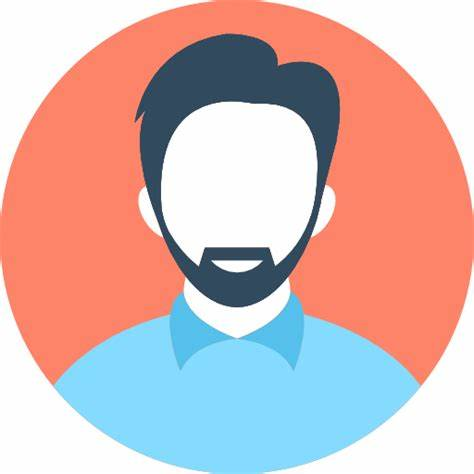
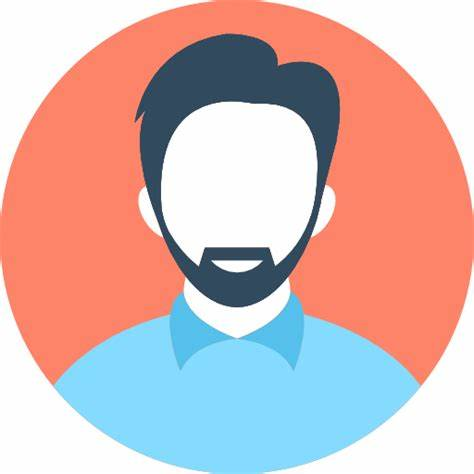
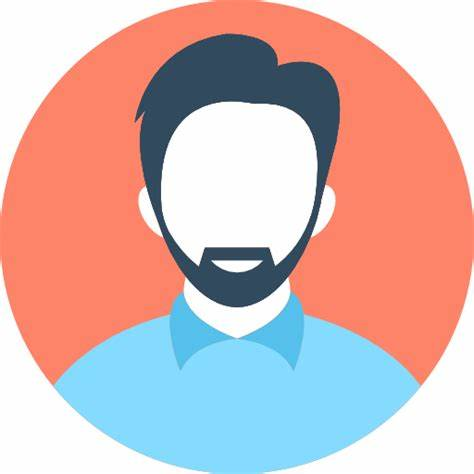
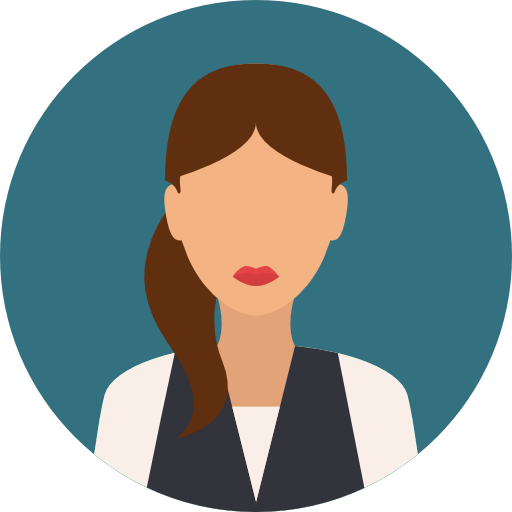
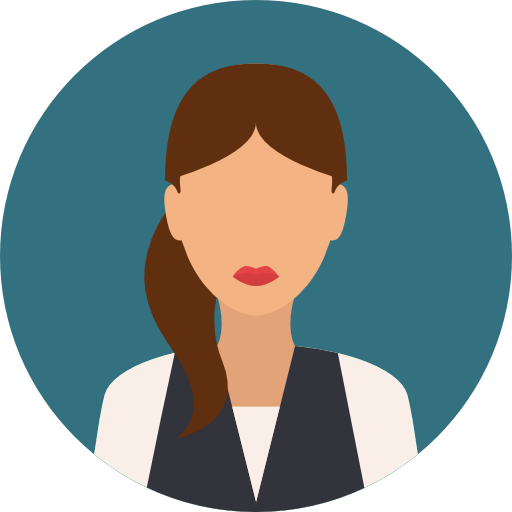
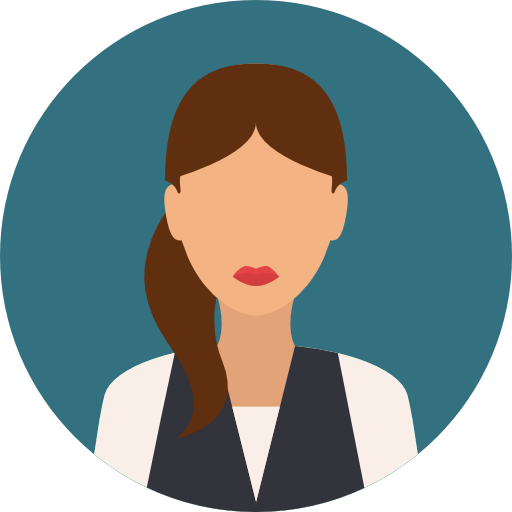

In [78]:
icons = alt.Chart(new).mark_image(
    width = 50,
    height = 50
).encode(
    x = 'value',
    y = 'y',
    url = 'icon'
)

lines = alt.Chart(new).mark_line(
    width = 50,
    height = 50
).encode(
    x = "value",
    y="y",
    color=alt.Color("country:N")
)

lines+icons

